In [6]:
#IMPORT CSV

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy.stats import normaltest
from sklearn.preprocessing import StandardScaler

df=pd.read_csv("model.csv")
df

age_days   n_tokens_title   n_tokens_review   n_unique_tokens  \
0           436                9               532          0.462264   
1           185               16              1012          0.446247   
2           210               12               506          0.546559   
3           723               11               241          0.543933   
4           345               11               983          0.405930   
...         ...              ...               ...               ...   
27995       694                9               214          0.455399   
27996       428                8               206          0.647059   
27997        93               11              1083          0.535104   
27998        90               12               817          0.452229   
27999       681               13              1239          0.382686   

        n_non_stop_words   n_non_stop_unique_tokens   num_hrefs  \
0                    1.0                   0.594427           7   
1                    1.0                   0.638112           4   
2                    1.0                   0.693291           8   
3                    1.0                   0.648649           5   
4                    1.0                   0.594747          11   
...                  ...                        ...         ...   
27995                1.0                   0.412429          43   
27996                1.0                   0.851240           5   
27997                1.0                   0.712627          32   
27998                1.0                   0.585170          12   
27999                1.0                   0.537212          12   

        num_self_hrefs   num_imgs   num_videos  ...   min_positive_polarity  \
0                    7          1            0  ...                0.136364   
1                    2          3           11  ...                0.100000   
2                    3          2            1  ...                0.050000   
3                    4          1            1  ...                0.136364   
4                    7          1            1  ...                0.100000   
...                ...        ...          ...  ...                     ...   
27995                3         11            0  ...                0.200000   
27996                3          0            1  ...                0.100000   
27997               27         11            1  ...                0.100000   
27998                0          2            0  ...                0.100000   
27999               10         10            1  ...                0.033333   

        max_positive_polarity  avg_negative_polarity   min_negative_polarity  \
0                         1.0              -0.180556               -0.250000   
1                         0.9              -0.318981               -1.000000   
2                         0.5              -0.292708               -0.750000   
3                         0.7               0.000000                0.000000   
4                         1.0              -0.256481               -0.800000   
...                       ...                    ...                     ...   
27995                     1.0              -0.333333               -0.333333   
27996                     0.5              -0.622222               -1.000000   
27997                     1.0              -0.404306               -1.000000   
27998                     0.7              -0.288889               -0.900000   
27999                     1.0              -0.128770               -0.187500   

        max_negative_polarity   title_subjectivity  title_sentiment_polarity  \
0                 -125.000000             0.500000                  0.500000   
1                   -0.050000             0.050000                -75.000000   
2                   -0.100000             0.000000                  0.000000   
3                    0.000000             0.000000                  0.000000   
4                   -0.0500

## Data analysis and Data preparation

In [7]:
#Check the type of the variables

df.dtypes

age_days                           int64
 n_tokens_title                    int64
 n_tokens_review                   int64
 n_unique_tokens                 float64
 n_non_stop_words                float64
 n_non_stop_unique_tokens        float64
 num_hrefs                         int64
 num_self_hrefs                    int64
 num_imgs                          int64
 num_videos                        int64
 average_token_length            float64
 num_keywords                      int64
product_category                  object
 self_reference_min_shares       float64
 self_reference_max_shares       float64
 self_reference_avg_sharess      float64
day                               object
topic_quality                    float64
topic_shipping                   float64
topic_packaging                  float64
topic_description                float64
topic_others                     float64
 global_subjectivity             float64
 global_sentiment_polarity       float64
 global_rate_pos

In [8]:
df.describe()

age_days   n_tokens_title   n_tokens_review   n_unique_tokens  \
count  28000.000000     28000.000000      28000.000000      28000.000000   
mean     360.376286        10.379679        559.612036          0.547309   
std      212.558887         2.106580        464.024465          0.102457   
min        8.000000         2.000000         18.000000          0.123422   
25%      175.000000         9.000000        258.000000          0.477454   
50%      348.000000        10.000000        420.000000          0.543549   
75%      547.000000        12.000000        728.000000          0.611805   
max      731.000000        20.000000       8474.000000          1.000000   

        n_non_stop_words   n_non_stop_unique_tokens     num_hrefs  \
count       2.800000e+04               28000.000000  28000.000000   
mean        1.000000e+00                   0.693451     11.229857   
std         4.052939e-09                   0.101096     11.424556   
min         9.999999e-01                   0.119134      0.000000   
25%         1.000000e+00                   0.632627      5.000000   
50%         1.000000e+00                   0.693603      8.000000   
75%         1.000000e+00                   0.757404     14.000000   
max         1.000000e+00                   1.000000    304.000000   

        num_self_hrefs      num_imgs    num_videos  ...  \
count     28000.000000  28000.000000  28000.000000  ...   
mean          3.382214      4.558214      1.261143  ...   
std           3.812180      8.275950      4.214034  ...   
min           0.000000      0.000000      0.000000  ...   
25%           1.000000      1.000000      0.000000  ...   
50%           3.000000      1.000000      0.000000  ...   
75%           4.000000      4.000000      1.000000  ...   
max          74.000000    128.000000     91.000000  ...   

        min_positive_polarity   max_positive_polarity   avg_negative_polarity  \
count            28000.000000            28000.000000            28000.000000   
mean                 1.146792                2.318526              -12.252049   
std                 19.518382               23.934590               60.885271   
min                  0.000000                0.000000             -875.000000   
25%                  0.050000                0.600000               -0.347396   
50%                  0.100000                0.800000               -0.264583   
75%                  0.100000                1.000000               -0.200000   
max                375.000000              375.000000                0.000000   

        min_negative_polarity   max_negative_polarity   title_subjectivity  \
count            28000.000000            28000.000000         28000.000000   
mean               -12.473952              -19.020554            11.086373   
std                 85.453870               45.202003            74.545257   
min               -875.000000             -875.000000             0.000000   
25%                 -0.800000               -0.200000             0.000000   
50%                 -0.500000               -0.100000             0.166667   
75%                 -0.333333               -0.050000             0.500000   
max                  0.000000                0.000000           975.000000   

        title_sentiment_polarity   abs_title_subjectivity  \
count               28000.000000             28000.000000   
mean                    1.648656                 5.542759   
std                    51.154457                37.231012   
min                  -875.000000                 0.000000   
25%                     0.000000                 0.166667   
50%                     0.000000                 0.500000   
75%                     0.150000                 0.500000   
max                   725.000000               475.000000   

        abs_title_sentiment_polarity          likes  
count                   28000.000000   28000.000000  
mean                        7.670698    3408.232750  
std                        

In [9]:
#Check if there are NaN

df.isna().any()

age_days                         False
 n_tokens_title                  False
 n_tokens_review                 False
 n_unique_tokens                 False
 n_non_stop_words                False
 n_non_stop_unique_tokens        False
 num_hrefs                       False
 num_self_hrefs                  False
 num_imgs                        False
 num_videos                      False
 average_token_length            False
 num_keywords                    False
product_category                 False
 self_reference_min_shares       False
 self_reference_max_shares       False
 self_reference_avg_sharess      False
day                              False
topic_quality                    False
topic_shipping                   False
topic_packaging                  False
topic_description                False
topic_others                     False
 global_subjectivity             False
 global_sentiment_polarity       False
 global_rate_positive_words      False
 global_rate_negative_wor

In [10]:
#Check for duplicates

dupl_rows=df[df.duplicated()]
dupl_rows

Empty DataFrame
Columns: [age_days,  n_tokens_title,  n_tokens_review,  n_unique_tokens,  n_non_stop_words,  n_non_stop_unique_tokens,  num_hrefs,  num_self_hrefs,  num_imgs,  num_videos,  average_token_length,  num_keywords, product_category,  self_reference_min_shares,  self_reference_max_shares,  self_reference_avg_sharess, day, topic_quality, topic_shipping, topic_packaging, topic_description, topic_others,  global_subjectivity,  global_sentiment_polarity,  global_rate_positive_words,  global_rate_negative_words,  rate_positive_words,  rate_negative_words,  avg_positive_polarity,  min_positive_polarity,  max_positive_polarity,  avg_negative_polarity,  min_negative_polarity,  max_negative_polarity,  title_subjectivity,  title_sentiment_polarity,  abs_title_subjectivity,  abs_title_sentiment_polarity, likes]
Index: []

[0 rows x 39 columns]

In [11]:
columns=df.columns
columns

Index(['age_days', ' n_tokens_title', ' n_tokens_review', ' n_unique_tokens',
       ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs',
       ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length',
       ' num_keywords', 'product_category', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess', 'day',
       'topic_quality', 'topic_shipping', 'topic_packaging',
       'topic_description', 'topic_others', ' global_subjectivity',
       ' global_sentiment_polarity', ' global_rate_positive_words',
       ' global_rate_negative_words', ' rate_positive_words',
       ' rate_negative_words', ' avg_positive_polarity',
       ' min_positive_polarity', ' max_positive_polarity',
       ' avg_negative_polarity', ' min_negative_polarity',
       ' max_negative_polarity', ' title_subjectivity',
       ' title_sentiment_polarity', ' abs_title_subjectivity',
       ' abs_title_sentiment_polarity', 'likes'],
      dtype='object'

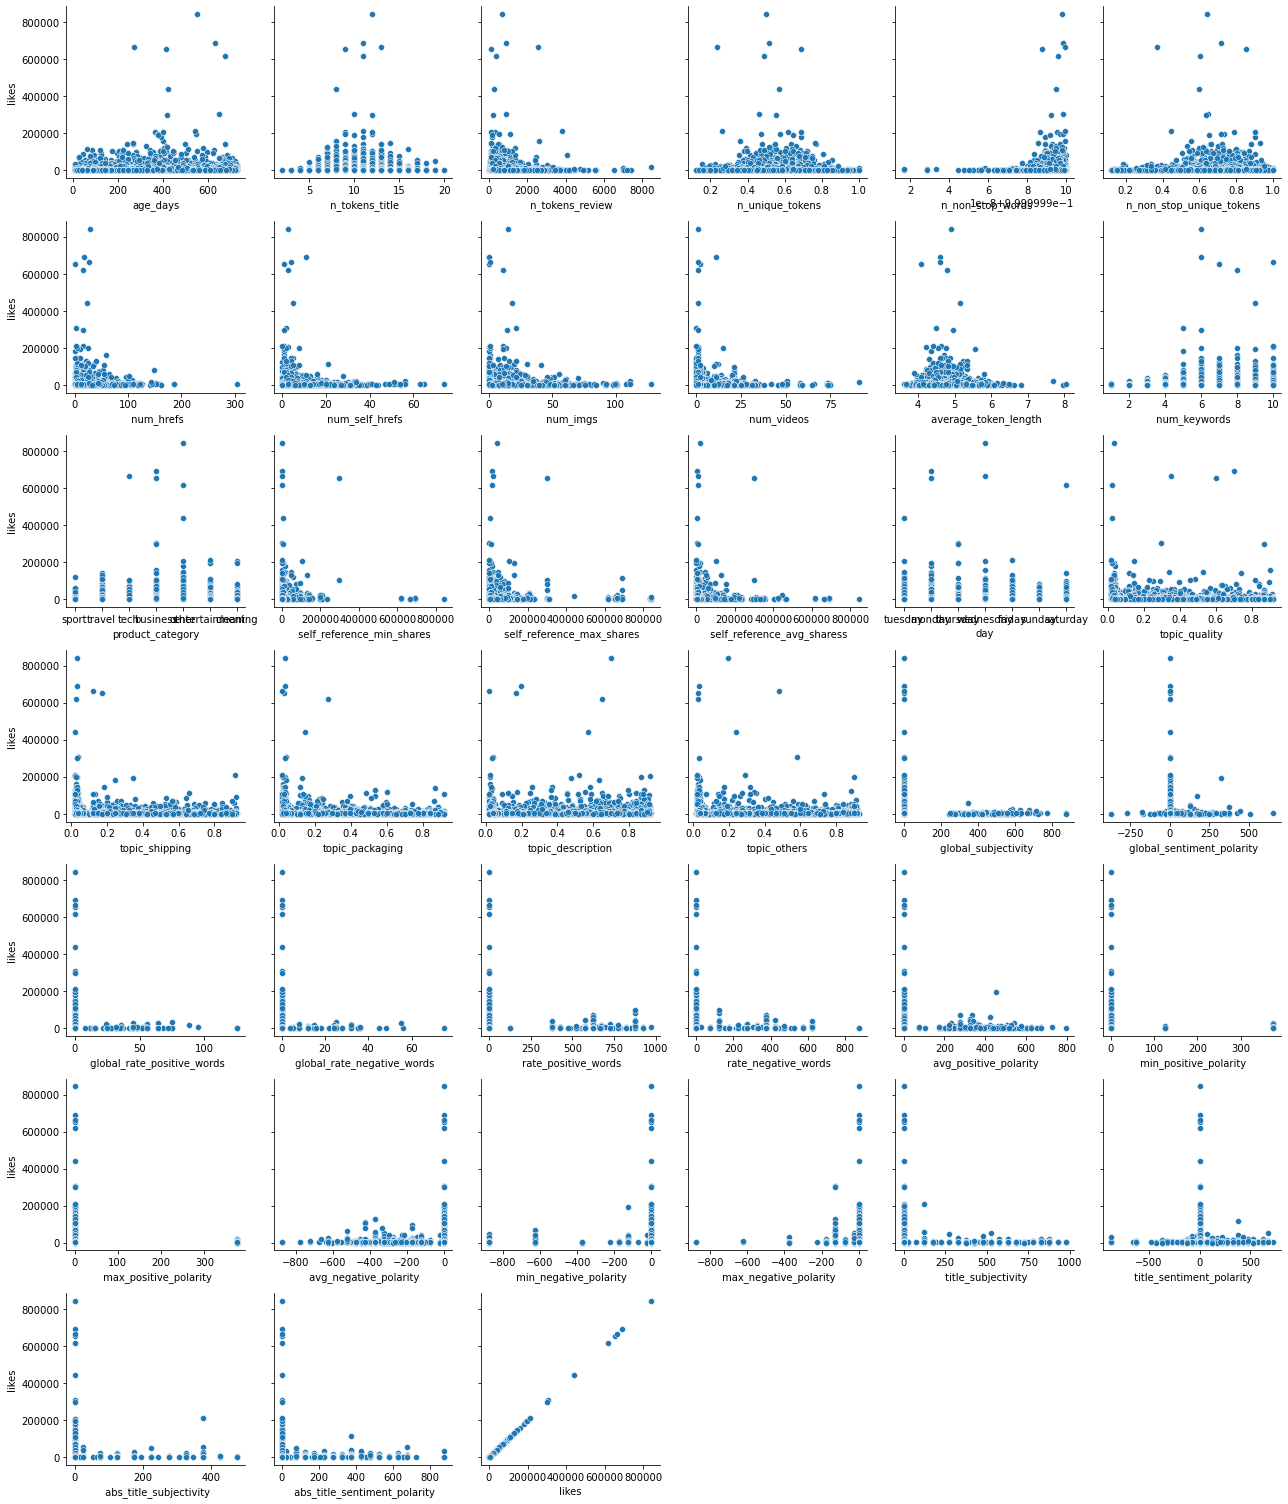

In [6]:
#Analyze the behavior of the variables with respect to the target 'likes'

g = sns.FacetGrid(pd.DataFrame(columns), col=0, col_wrap=6, sharex=False)
for ax, x_var in zip(g.axes, columns):
    sns.scatterplot(data=df, x=x_var, y=df['likes'], ax=ax)
g.tight_layout()

#The last variables (from 'global subjectivity' on) contain many values out of range, 
#in fact in some cases the range should be from 0 to 1 and in other cases from -1 to 1 and from -1 to 0

In [12]:
#Datset with just the variables out of range (from 'global subjectivity' to ''abs title sentiment polarity')

data_to_div=df.iloc[:,22:38]
data_to_div

global_subjectivity   global_sentiment_polarity  \
0                  0.432429                    0.184702   
1                  0.425764                    0.146228   
2                  0.386667                   -0.092876   
3                  0.233437                    0.261632   
4                  0.409021                    0.116117   
...                     ...                         ...   
27995              0.536012                    0.340476   
27996              0.504189                    0.071747   
27997              0.502332                    0.050253   
27998              0.390490                    0.081720   
27999              0.478202                    0.163093   

        global_rate_positive_words   global_rate_negative_words  \
0                         0.033835                     0.011278   
1                         0.032609                     0.017787   
2                         0.021739                     0.031621   
3                         0.074689                     0.000000   
4                         0.043744                     0.018311   
...                            ...                          ...   
27995                     0.028037                     0.004673   
27996                     0.043689                     0.014563   
27997                     0.034164                     0.027701   
27998                     0.035496                     0.014688   
27999                     0.046812                     0.007264   

        rate_positive_words   rate_negative_words   avg_positive_polarity  \
0                  0.750000              0.250000                0.400505   
1                  0.647059              0.352941                0.504457   
2                  0.407407              0.592593                0.179924   
3                  1.000000              0.000000                0.345671   
4                  0.704918              0.295082                0.341548   
...                     ...                   ...                     ...   
27995              0.857143              0.142857                0.509524   
27996              0.750000              0.250000                0.342929   
27997              0.552239              0.447761                0.422991   
27998              0.707317              0.292683                0.308378   
27999              0.865672              0.134328                0.318747   

        min_positive_polarity   max_positive_polarity   avg_negative_polarity  \
0                    0.136364                     1.0               -0.180556   
1                    0.100000                     0.9               -0.318981   
2                    0.050000                     0.5               -0.292708   
3                    0.136364                     0.7                0.000000   
4                    0.100000                     1.0               -0.256481   
...                       ...                     ...                     ...   
27995                0.200000                     1.0               -0.333333   
27996                0.100000                     0.5               -0.622222   
27997                0.100000                     1.0               -0.404306   
27998                0.100000                     0.7               -0.288889   
27999                0.033333                     1.0               -0.128770   

        min_negative_polarity   max_negative_polarity   title_subjectivity  \
0                   -0.250000             -125.000000             0.500000   
1                   -1.000000               -0.050000             0.050000   
2                   -0.750000               -0.100000             0.000000   
3                    0.000000                0.000000             0.000000   
4                   -0.800000               -0.050000             0.000000   
...                       ...                     ...                  ...   
27995               -0.333333               -0.333

In [13]:
column_to_div=data_to_div.columns
column_to_div

Index([' global_subjectivity', ' global_sentiment_polarity',
       ' global_rate_positive_words', ' global_rate_negative_words',
       ' rate_positive_words', ' rate_negative_words',
       ' avg_positive_polarity', ' min_positive_polarity',
       ' max_positive_polarity', ' avg_negative_polarity',
       ' min_negative_polarity', ' max_negative_polarity',
       ' title_subjectivity', ' title_sentiment_polarity',
       ' abs_title_subjectivity', ' abs_title_sentiment_polarity'],
      dtype='object')

In [14]:
data_to_div.shape[1]

16

In [15]:
#Divide for 1000 all the columns from 'global subjectiviy' on whose abs value was higher than 1

for i in range(data_to_div.shape[1]):
    
    df[column_to_div[i]]=df[column_to_div[i]].apply(lambda x: x/1000 if (abs(x)>1) else x)
    
max(df[' global_rate_positive_words']) #check if the transformation has gone well


0.155487804878

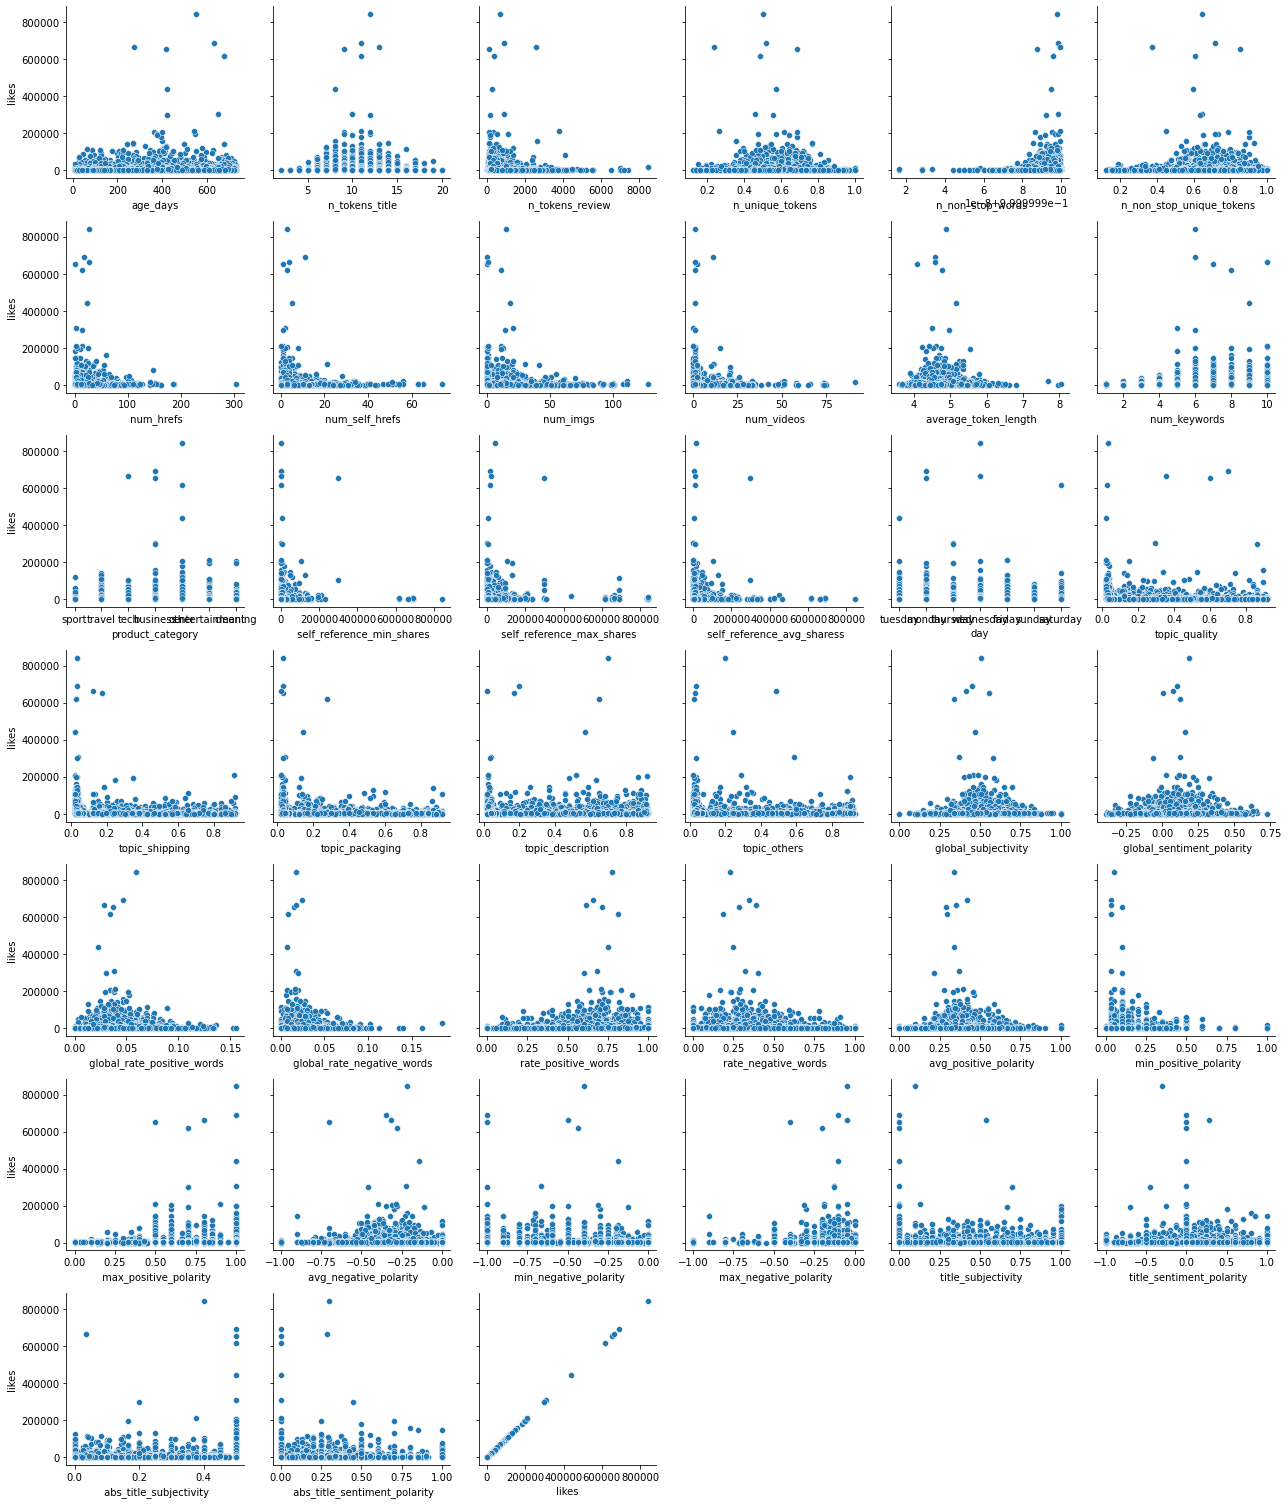

In [11]:
#Scatterplot after the scaling 

g = sns.FacetGrid(pd.DataFrame(columns), col=0, col_wrap=6, sharex=False)
for ax, x_var in zip(g.axes, columns):
    sns.scatterplot(data=df, x=x_var, y=df['likes'], ax=ax)
g.tight_layout()

-0.23727867677974848


C:\Users\13-U005NL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

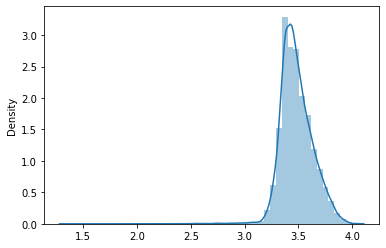

In [16]:
#Apply Box Cox transformation to the target variable (likes)

from scipy import stats
boxcox_data = stats.boxcox(df['likes']) 
print(boxcox_data[1]) #lambda of the Box Cox transformation
sns.distplot(boxcox_data[0]) #likes transformed (boxcox_data[0])

In [86]:
#Save the lambda obtained through the Box Cox transformation 
import pickle
pickle.dump(boxcox_data[1], open('NO_CORR_LAMBDA.pkl', 'wb')) 

In [17]:
boxcox_data[0]


array([3.53578839, 3.35571844, 3.39616745, ..., 3.43081256, 3.43081256,
       3.55606469])

In [18]:
#Drop column 'likes' and use as target the column 'trasflikes'

df['trasflikes']=boxcox_data[0]
df
df = df.drop(columns="likes") 

In [19]:
#New columns, the target variable has been replaced with 'trasflikes'
columns=df.columns
columns

Index(['age_days', ' n_tokens_title', ' n_tokens_review', ' n_unique_tokens',
       ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs',
       ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length',
       ' num_keywords', 'product_category', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess', 'day',
       'topic_quality', 'topic_shipping', 'topic_packaging',
       'topic_description', 'topic_others', ' global_subjectivity',
       ' global_sentiment_polarity', ' global_rate_positive_words',
       ' global_rate_negative_words', ' rate_positive_words',
       ' rate_negative_words', ' avg_positive_polarity',
       ' min_positive_polarity', ' max_positive_polarity',
       ' avg_negative_polarity', ' min_negative_polarity',
       ' max_negative_polarity', ' title_subjectivity',
       ' title_sentiment_polarity', ' abs_title_subjectivity',
       ' abs_title_sentiment_polarity', 'trasflikes'],
      dtype='ob

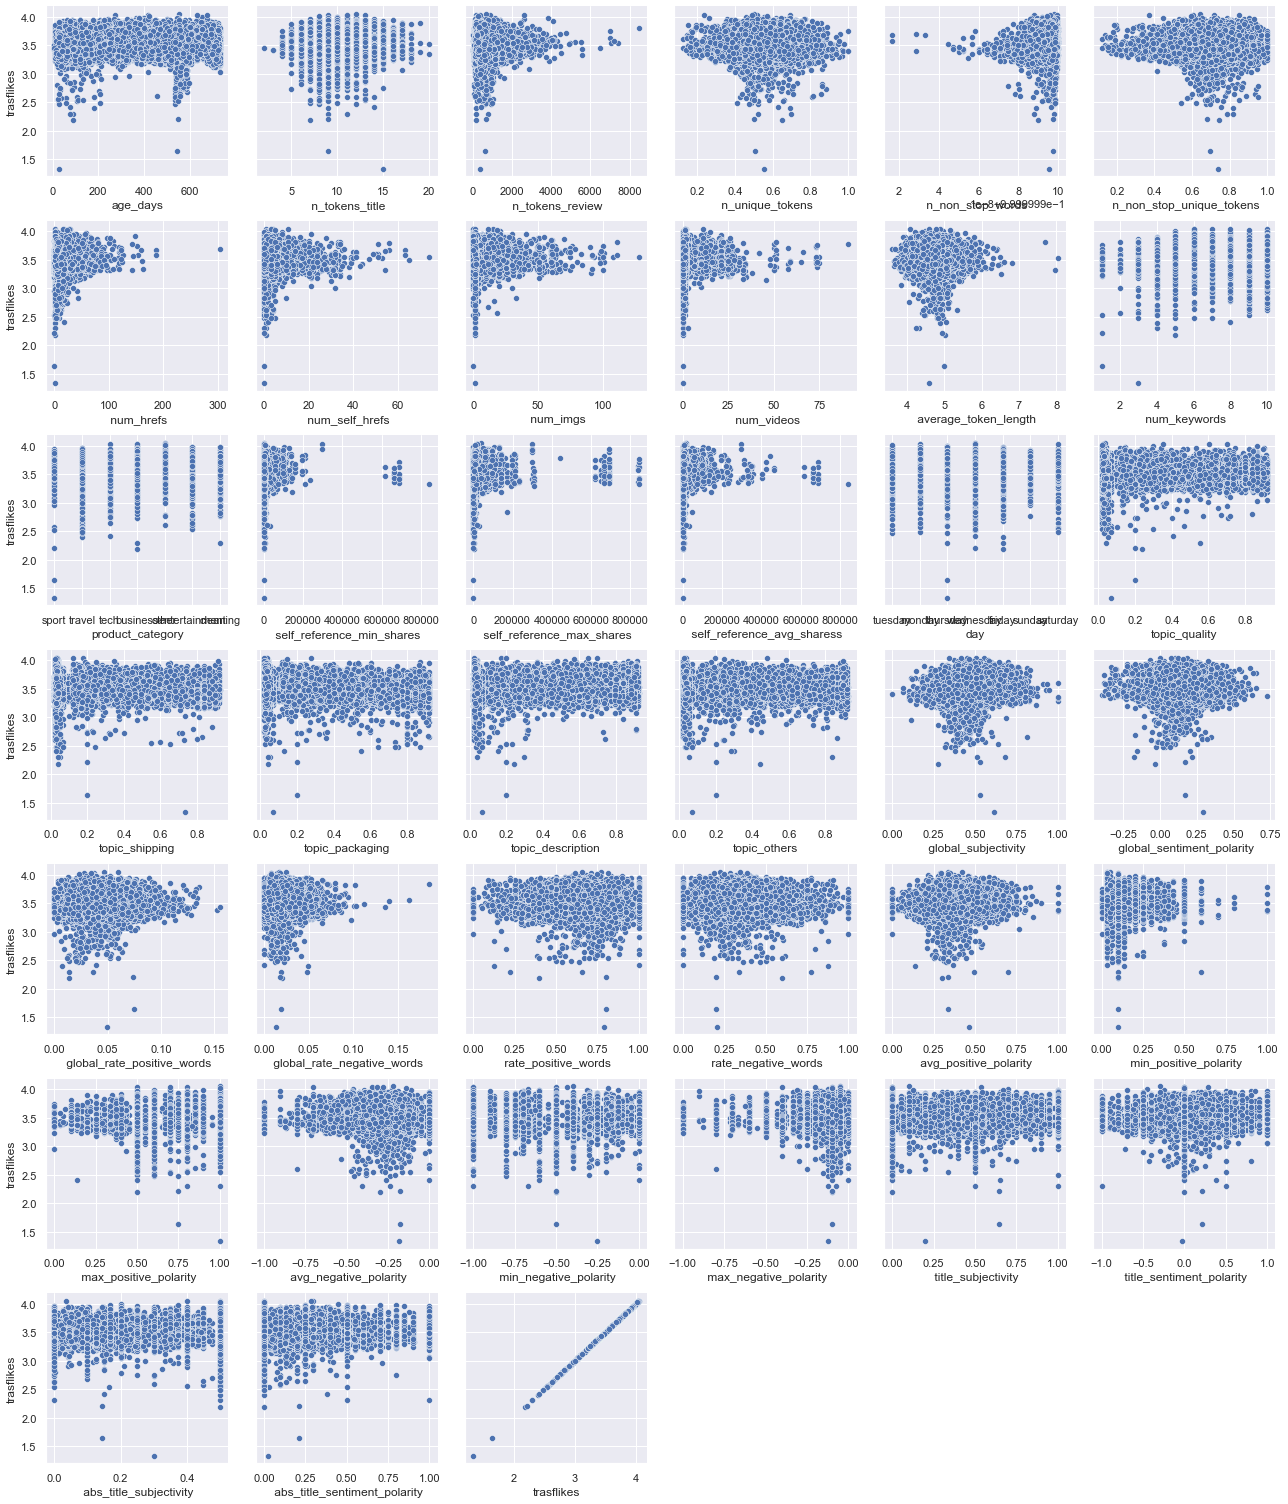

In [166]:
#Scatterplot with respect to the new target variable 'trasflikes'

g = sns.FacetGrid(pd.DataFrame(columns), col=0, col_wrap=6, sharex=False)
for ax, x_var in zip(g.axes, columns):
    sns.scatterplot(data=df, x=x_var, y=df['trasflikes'], ax=ax)
g.tight_layout()

## Outliers detection and distribution comparison

array([[<AxesSubplot:title={'center':'age_days'}>,
        <AxesSubplot:title={'center':' n_tokens_title'}>,
        <AxesSubplot:title={'center':' n_tokens_review'}>],
       [<AxesSubplot:title={'center':' n_unique_tokens'}>,
        <AxesSubplot:title={'center':' n_non_stop_words'}>,
        <AxesSubplot:title={'center':' n_non_stop_unique_tokens'}>],
       [<AxesSubplot:title={'center':' num_hrefs'}>,
        <AxesSubplot:title={'center':' num_self_hrefs'}>,
        <AxesSubplot:title={'center':' num_imgs'}>],
       [<AxesSubplot:title={'center':' num_videos'}>,
        <AxesSubplot:title={'center':' average_token_length'}>,
        <AxesSubplot:title={'center':' num_keywords'}>]], dtype=object)

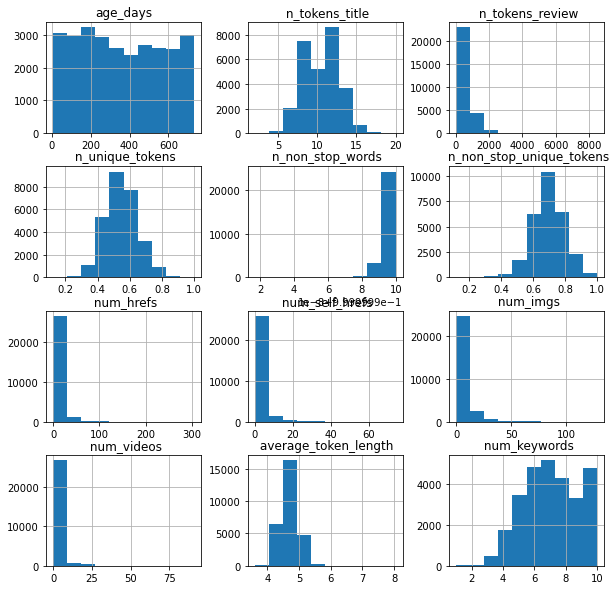

In [16]:
#histograms of the first 12 variables
df.iloc[:,0:12].hist(figsize=(10,10))

<AxesSubplot:>

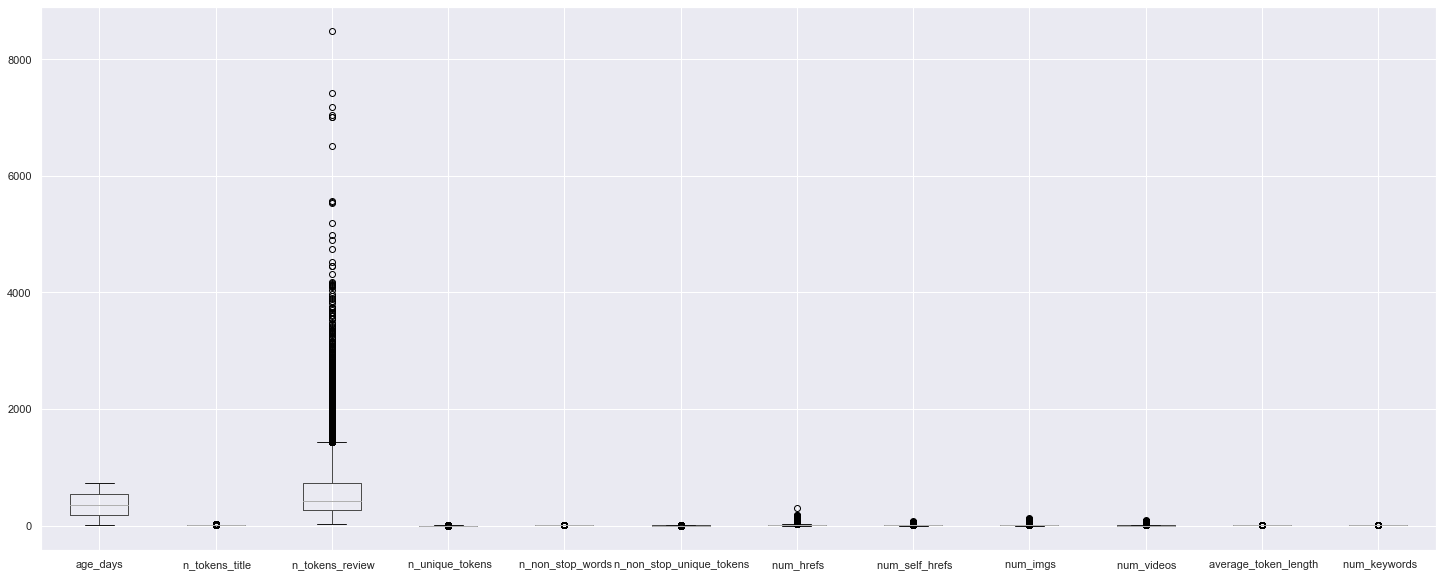

In [20]:
#boxplot of the first 12 variables

sns.set(rc={'figure.figsize':(25,10)})
df.iloc[:,0:12].boxplot()



<AxesSubplot:xlabel=' n_tokens_title'>

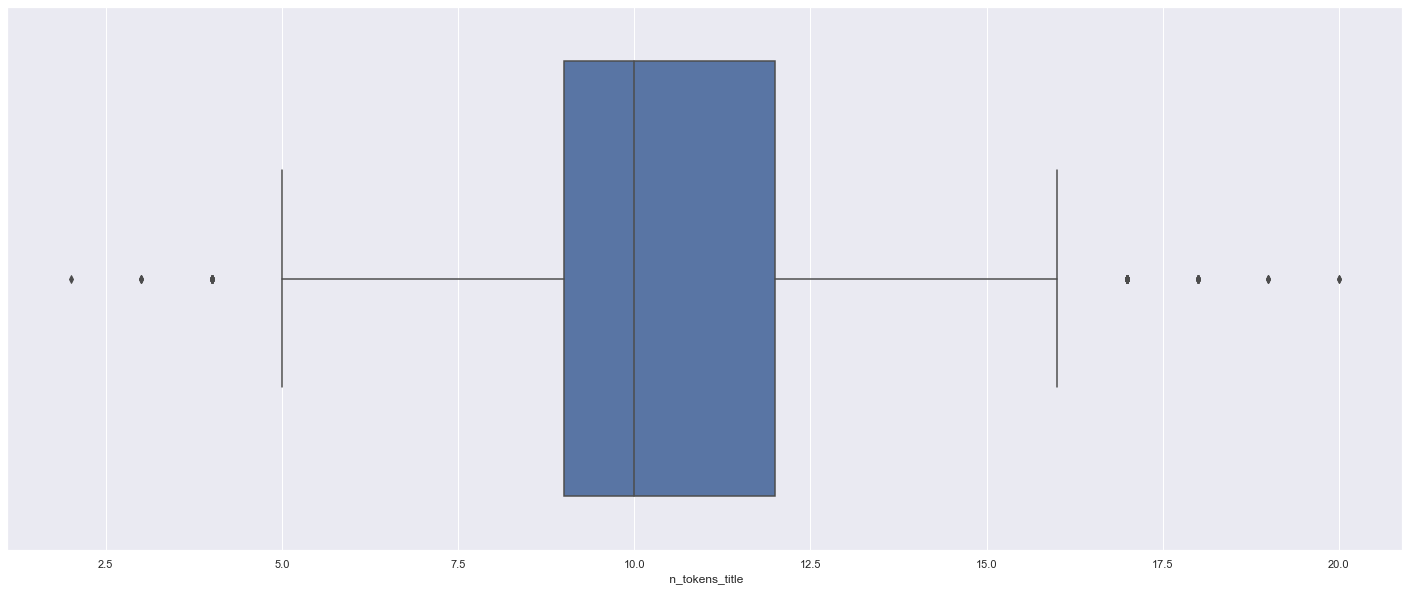

In [169]:
sns.boxplot(x=df[' n_tokens_title']) 

In [21]:
#From now on by looking at the boxplots, the scatterplot and the comparison with some theoretical distributions some observations will be deleted

dfA=df[df[' n_tokens_title']>=5]
dfA
dfB=dfA[dfA[' n_tokens_title']<16.5]
dfB

age_days   n_tokens_title   n_tokens_review   n_unique_tokens  \
0           436                9               532          0.462264   
1           185               16              1012          0.446247   
2           210               12               506          0.546559   
3           723               11               241          0.543933   
4           345               11               983          0.405930   
...         ...              ...               ...               ...   
27995       694                9               214          0.455399   
27996       428                8               206          0.647059   
27997        93               11              1083          0.535104   
27998        90               12               817          0.452229   
27999       681               13              1239          0.382686   

        n_non_stop_words   n_non_stop_unique_tokens   num_hrefs  \
0                    1.0                   0.594427           7   
1                    1.0                   0.638112           4   
2                    1.0                   0.693291           8   
3                    1.0                   0.648649           5   
4                    1.0                   0.594747          11   
...                  ...                        ...         ...   
27995                1.0                   0.412429          43   
27996                1.0                   0.851240           5   
27997                1.0                   0.712627          32   
27998                1.0                   0.585170          12   
27999                1.0                   0.537212          12   

        num_self_hrefs   num_imgs   num_videos  ...   min_positive_polarity  \
0                    7          1            0  ...                0.136364   
1                    2          3           11  ...                0.100000   
2                    3          2            1  ...                0.050000   
3                    4          1            1  ...                0.136364   
4                    7          1            1  ...                0.100000   
...                ...        ...          ...  ...                     ...   
27995                3         11            0  ...                0.200000   
27996                3          0            1  ...                0.100000   
27997               27         11            1  ...                0.100000   
27998                0          2            0  ...                0.100000   
27999               10         10            1  ...                0.033333   

        max_positive_polarity  avg_negative_polarity   min_negative_polarity  \
0                         1.0              -0.180556               -0.250000   
1                         0.9              -0.318981               -1.000000   
2                         0.5              -0.292708               -0.750000   
3                         0.7               0.000000                0.000000   
4                         1.0              -0.256481               -0.800000   
...                       ...                    ...                     ...   
27995                     1.0              -0.333333               -0.333333   
27996                     0.5              -0.622222               -1.000000   
27997                     1.0              -0.404306               -1.000000   
27998                     0.7              -0.288889               -0.900000   
27999                     1.0              -0.128770               -0.187500   

        max_negative_polarity   title_subjectivity  title_sentiment_polarity  \
0                   -0.125000             0.500000                  0.500000   
1                   -0.050000             0.050000                 -0.075000   
2                   -0.100000             0.000000                  0.000000   
3                    0.000000             0.000000                  0.000000   
4                   -0.0500

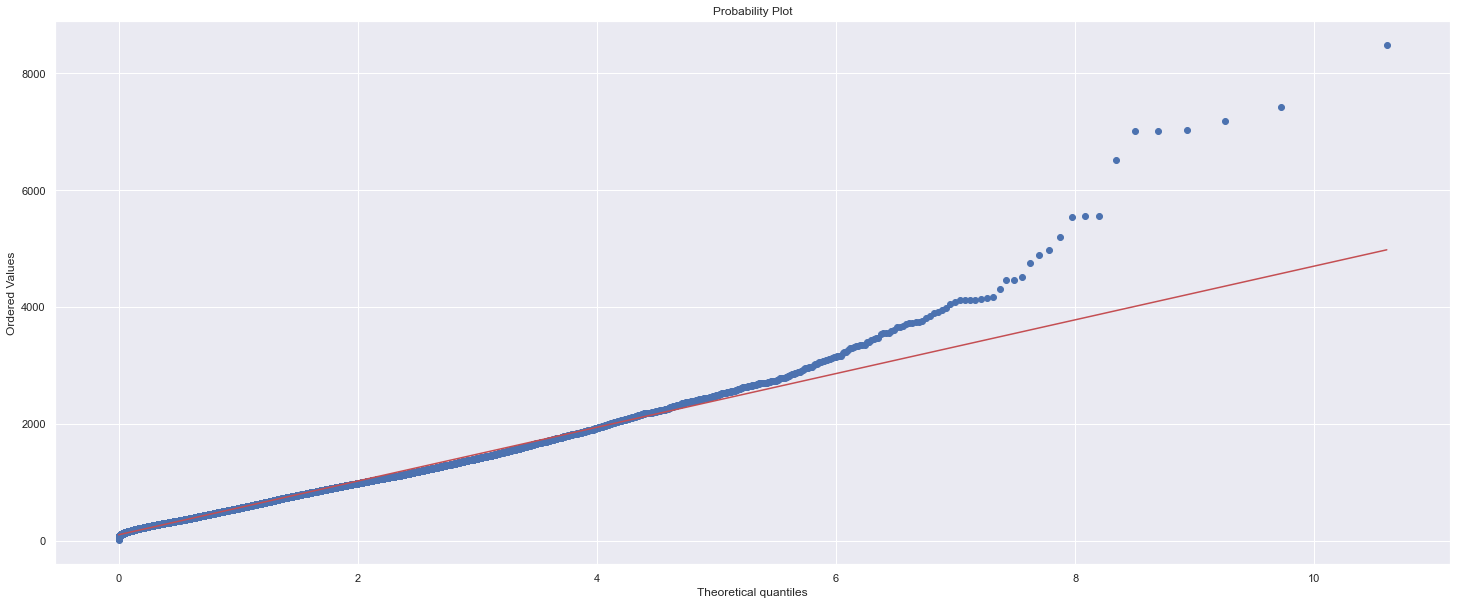

In [17]:
import pylab 

stats.probplot(df[' n_tokens_review'], dist="expon", plot=pylab)
pylab.show()

In [22]:
dfC=dfB[dfB[' n_tokens_review']<4500]
dfC

age_days   n_tokens_title   n_tokens_review   n_unique_tokens  \
0           436                9               532          0.462264   
1           185               16              1012          0.446247   
2           210               12               506          0.546559   
3           723               11               241          0.543933   
4           345               11               983          0.405930   
...         ...              ...               ...               ...   
27995       694                9               214          0.455399   
27996       428                8               206          0.647059   
27997        93               11              1083          0.535104   
27998        90               12               817          0.452229   
27999       681               13              1239          0.382686   

        n_non_stop_words   n_non_stop_unique_tokens   num_hrefs  \
0                    1.0                   0.594427           7   
1                    1.0                   0.638112           4   
2                    1.0                   0.693291           8   
3                    1.0                   0.648649           5   
4                    1.0                   0.594747          11   
...                  ...                        ...         ...   
27995                1.0                   0.412429          43   
27996                1.0                   0.851240           5   
27997                1.0                   0.712627          32   
27998                1.0                   0.585170          12   
27999                1.0                   0.537212          12   

        num_self_hrefs   num_imgs   num_videos  ...   min_positive_polarity  \
0                    7          1            0  ...                0.136364   
1                    2          3           11  ...                0.100000   
2                    3          2            1  ...                0.050000   
3                    4          1            1  ...                0.136364   
4                    7          1            1  ...                0.100000   
...                ...        ...          ...  ...                     ...   
27995                3         11            0  ...                0.200000   
27996                3          0            1  ...                0.100000   
27997               27         11            1  ...                0.100000   
27998                0          2            0  ...                0.100000   
27999               10         10            1  ...                0.033333   

        max_positive_polarity  avg_negative_polarity   min_negative_polarity  \
0                         1.0              -0.180556               -0.250000   
1                         0.9              -0.318981               -1.000000   
2                         0.5              -0.292708               -0.750000   
3                         0.7               0.000000                0.000000   
4                         1.0              -0.256481               -0.800000   
...                       ...                    ...                     ...   
27995                     1.0              -0.333333               -0.333333   
27996                     0.5              -0.622222               -1.000000   
27997                     1.0              -0.404306               -1.000000   
27998                     0.7              -0.288889               -0.900000   
27999                     1.0              -0.128770               -0.187500   

        max_negative_polarity   title_subjectivity  title_sentiment_polarity  \
0                   -0.125000             0.500000                  0.500000   
1                   -0.050000             0.050000                 -0.075000   
2                   -0.100000             0.000000                  0.000000   
3                    0.000000             0.000000                  0.000000   
4                   -0.0500

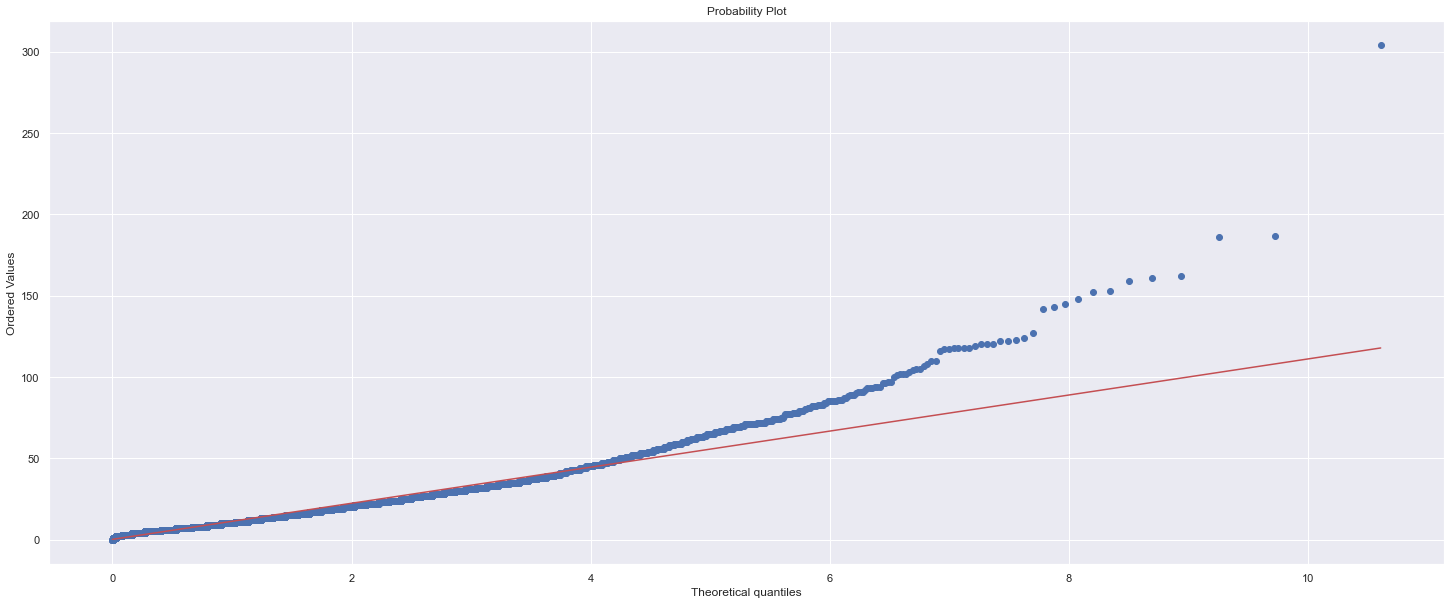

In [174]:
stats.probplot(df[' num_hrefs'], dist="expon", plot=pylab)
pylab.show()

In [23]:
dfD=dfC[dfC[' num_hrefs']<=100]
dfD

age_days   n_tokens_title   n_tokens_review   n_unique_tokens  \
0           436                9               532          0.462264   
1           185               16              1012          0.446247   
2           210               12               506          0.546559   
3           723               11               241          0.543933   
4           345               11               983          0.405930   
...         ...              ...               ...               ...   
27995       694                9               214          0.455399   
27996       428                8               206          0.647059   
27997        93               11              1083          0.535104   
27998        90               12               817          0.452229   
27999       681               13              1239          0.382686   

        n_non_stop_words   n_non_stop_unique_tokens   num_hrefs  \
0                    1.0                   0.594427           7   
1                    1.0                   0.638112           4   
2                    1.0                   0.693291           8   
3                    1.0                   0.648649           5   
4                    1.0                   0.594747          11   
...                  ...                        ...         ...   
27995                1.0                   0.412429          43   
27996                1.0                   0.851240           5   
27997                1.0                   0.712627          32   
27998                1.0                   0.585170          12   
27999                1.0                   0.537212          12   

        num_self_hrefs   num_imgs   num_videos  ...   min_positive_polarity  \
0                    7          1            0  ...                0.136364   
1                    2          3           11  ...                0.100000   
2                    3          2            1  ...                0.050000   
3                    4          1            1  ...                0.136364   
4                    7          1            1  ...                0.100000   
...                ...        ...          ...  ...                     ...   
27995                3         11            0  ...                0.200000   
27996                3          0            1  ...                0.100000   
27997               27         11            1  ...                0.100000   
27998                0          2            0  ...                0.100000   
27999               10         10            1  ...                0.033333   

        max_positive_polarity  avg_negative_polarity   min_negative_polarity  \
0                         1.0              -0.180556               -0.250000   
1                         0.9              -0.318981               -1.000000   
2                         0.5              -0.292708               -0.750000   
3                         0.7               0.000000                0.000000   
4                         1.0              -0.256481               -0.800000   
...                       ...                    ...                     ...   
27995                     1.0              -0.333333               -0.333333   
27996                     0.5              -0.622222               -1.000000   
27997                     1.0              -0.404306               -1.000000   
27998                     0.7              -0.288889               -0.900000   
27999                     1.0              -0.128770               -0.187500   

        max_negative_polarity   title_subjectivity  title_sentiment_polarity  \
0                   -0.125000             0.500000                  0.500000   
1                   -0.050000             0.050000                 -0.075000   
2                   -0.100000             0.000000                  0.000000   
3                    0.000000             0.000000                  0.000000   
4                   -0.0500

In [24]:
dfE=dfD[dfD[' num_self_hrefs']<40]
dfE

age_days   n_tokens_title   n_tokens_review   n_unique_tokens  \
0           436                9               532          0.462264   
1           185               16              1012          0.446247   
2           210               12               506          0.546559   
3           723               11               241          0.543933   
4           345               11               983          0.405930   
...         ...              ...               ...               ...   
27995       694                9               214          0.455399   
27996       428                8               206          0.647059   
27997        93               11              1083          0.535104   
27998        90               12               817          0.452229   
27999       681               13              1239          0.382686   

        n_non_stop_words   n_non_stop_unique_tokens   num_hrefs  \
0                    1.0                   0.594427           7   
1                    1.0                   0.638112           4   
2                    1.0                   0.693291           8   
3                    1.0                   0.648649           5   
4                    1.0                   0.594747          11   
...                  ...                        ...         ...   
27995                1.0                   0.412429          43   
27996                1.0                   0.851240           5   
27997                1.0                   0.712627          32   
27998                1.0                   0.585170          12   
27999                1.0                   0.537212          12   

        num_self_hrefs   num_imgs   num_videos  ...   min_positive_polarity  \
0                    7          1            0  ...                0.136364   
1                    2          3           11  ...                0.100000   
2                    3          2            1  ...                0.050000   
3                    4          1            1  ...                0.136364   
4                    7          1            1  ...                0.100000   
...                ...        ...          ...  ...                     ...   
27995                3         11            0  ...                0.200000   
27996                3          0            1  ...                0.100000   
27997               27         11            1  ...                0.100000   
27998                0          2            0  ...                0.100000   
27999               10         10            1  ...                0.033333   

        max_positive_polarity  avg_negative_polarity   min_negative_polarity  \
0                         1.0              -0.180556               -0.250000   
1                         0.9              -0.318981               -1.000000   
2                         0.5              -0.292708               -0.750000   
3                         0.7               0.000000                0.000000   
4                         1.0              -0.256481               -0.800000   
...                       ...                    ...                     ...   
27995                     1.0              -0.333333               -0.333333   
27996                     0.5              -0.622222               -1.000000   
27997                     1.0              -0.404306               -1.000000   
27998                     0.7              -0.288889               -0.900000   
27999                     1.0              -0.128770               -0.187500   

        max_negative_polarity   title_subjectivity  title_sentiment_polarity  \
0                   -0.125000             0.500000                  0.500000   
1                   -0.050000             0.050000                 -0.075000   
2                   -0.100000             0.000000                  0.000000   
3                    0.000000             0.000000                  0.000000   
4                   -0.0500

In [25]:
dfF=dfE[dfE[' num_imgs']<90]
dfF

age_days   n_tokens_title   n_tokens_review   n_unique_tokens  \
0           436                9               532          0.462264   
1           185               16              1012          0.446247   
2           210               12               506          0.546559   
3           723               11               241          0.543933   
4           345               11               983          0.405930   
...         ...              ...               ...               ...   
27995       694                9               214          0.455399   
27996       428                8               206          0.647059   
27997        93               11              1083          0.535104   
27998        90               12               817          0.452229   
27999       681               13              1239          0.382686   

        n_non_stop_words   n_non_stop_unique_tokens   num_hrefs  \
0                    1.0                   0.594427           7   
1                    1.0                   0.638112           4   
2                    1.0                   0.693291           8   
3                    1.0                   0.648649           5   
4                    1.0                   0.594747          11   
...                  ...                        ...         ...   
27995                1.0                   0.412429          43   
27996                1.0                   0.851240           5   
27997                1.0                   0.712627          32   
27998                1.0                   0.585170          12   
27999                1.0                   0.537212          12   

        num_self_hrefs   num_imgs   num_videos  ...   min_positive_polarity  \
0                    7          1            0  ...                0.136364   
1                    2          3           11  ...                0.100000   
2                    3          2            1  ...                0.050000   
3                    4          1            1  ...                0.136364   
4                    7          1            1  ...                0.100000   
...                ...        ...          ...  ...                     ...   
27995                3         11            0  ...                0.200000   
27996                3          0            1  ...                0.100000   
27997               27         11            1  ...                0.100000   
27998                0          2            0  ...                0.100000   
27999               10         10            1  ...                0.033333   

        max_positive_polarity  avg_negative_polarity   min_negative_polarity  \
0                         1.0              -0.180556               -0.250000   
1                         0.9              -0.318981               -1.000000   
2                         0.5              -0.292708               -0.750000   
3                         0.7               0.000000                0.000000   
4                         1.0              -0.256481               -0.800000   
...                       ...                    ...                     ...   
27995                     1.0              -0.333333               -0.333333   
27996                     0.5              -0.622222               -1.000000   
27997                     1.0              -0.404306               -1.000000   
27998                     0.7              -0.288889               -0.900000   
27999                     1.0              -0.128770               -0.187500   

        max_negative_polarity   title_subjectivity  title_sentiment_polarity  \
0                   -0.125000             0.500000                  0.500000   
1                   -0.050000             0.050000                 -0.075000   
2                   -0.100000             0.000000                  0.000000   
3                    0.000000             0.000000                  0.000000   
4                   -0.0500

<AxesSubplot:>

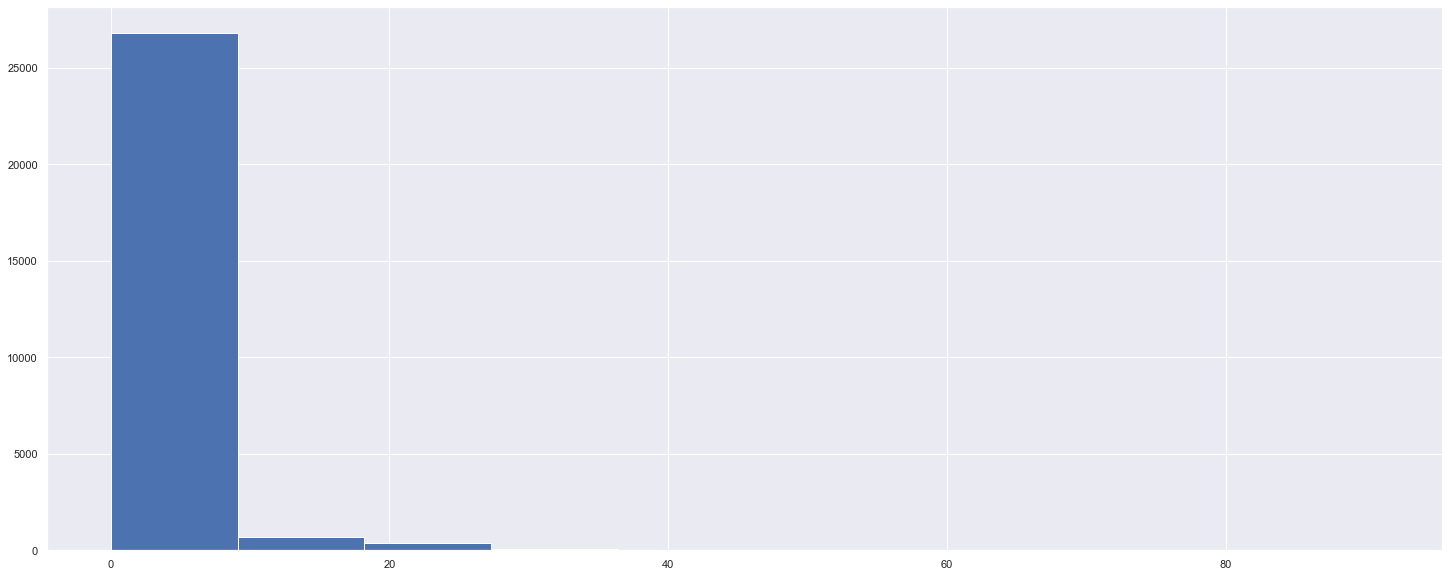

In [178]:
df[' num_videos'].hist()

In [26]:
dfG=dfF[dfF[' num_videos']<40]
dfG

age_days   n_tokens_title   n_tokens_review   n_unique_tokens  \
0           436                9               532          0.462264   
1           185               16              1012          0.446247   
2           210               12               506          0.546559   
3           723               11               241          0.543933   
4           345               11               983          0.405930   
...         ...              ...               ...               ...   
27995       694                9               214          0.455399   
27996       428                8               206          0.647059   
27997        93               11              1083          0.535104   
27998        90               12               817          0.452229   
27999       681               13              1239          0.382686   

        n_non_stop_words   n_non_stop_unique_tokens   num_hrefs  \
0                    1.0                   0.594427           7   
1                    1.0                   0.638112           4   
2                    1.0                   0.693291           8   
3                    1.0                   0.648649           5   
4                    1.0                   0.594747          11   
...                  ...                        ...         ...   
27995                1.0                   0.412429          43   
27996                1.0                   0.851240           5   
27997                1.0                   0.712627          32   
27998                1.0                   0.585170          12   
27999                1.0                   0.537212          12   

        num_self_hrefs   num_imgs   num_videos  ...   min_positive_polarity  \
0                    7          1            0  ...                0.136364   
1                    2          3           11  ...                0.100000   
2                    3          2            1  ...                0.050000   
3                    4          1            1  ...                0.136364   
4                    7          1            1  ...                0.100000   
...                ...        ...          ...  ...                     ...   
27995                3         11            0  ...                0.200000   
27996                3          0            1  ...                0.100000   
27997               27         11            1  ...                0.100000   
27998                0          2            0  ...                0.100000   
27999               10         10            1  ...                0.033333   

        max_positive_polarity  avg_negative_polarity   min_negative_polarity  \
0                         1.0              -0.180556               -0.250000   
1                         0.9              -0.318981               -1.000000   
2                         0.5              -0.292708               -0.750000   
3                         0.7               0.000000                0.000000   
4                         1.0              -0.256481               -0.800000   
...                       ...                    ...                     ...   
27995                     1.0              -0.333333               -0.333333   
27996                     0.5              -0.622222               -1.000000   
27997                     1.0              -0.404306               -1.000000   
27998                     0.7              -0.288889               -0.900000   
27999                     1.0              -0.128770               -0.187500   

        max_negative_polarity   title_subjectivity  title_sentiment_polarity  \
0                   -0.125000             0.500000                  0.500000   
1                   -0.050000             0.050000                 -0.075000   
2                   -0.100000             0.000000                  0.000000   
3                    0.000000             0.000000                  0.000000   
4                   -0.0500

<AxesSubplot:>

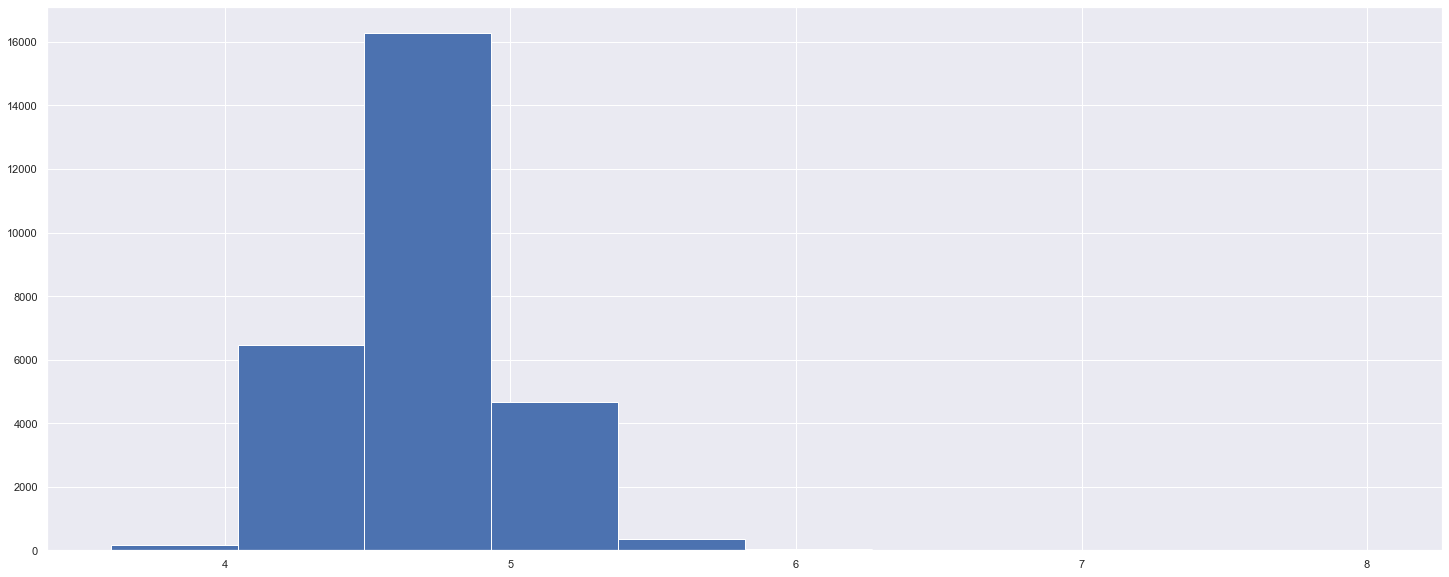

In [180]:
df[' average_token_length'].hist()

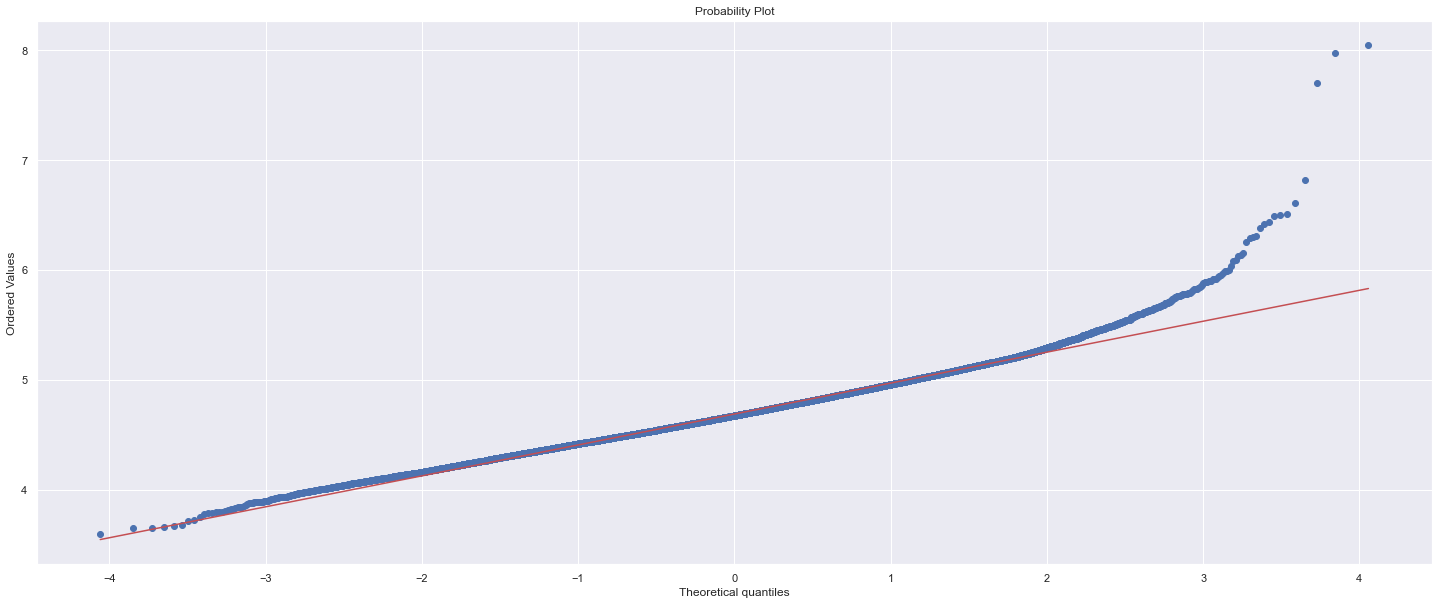

In [181]:
stats.probplot(df[' average_token_length'], dist="norm", plot=pylab)
pylab.show()

In [27]:
dfH=dfG[dfG[' average_token_length']<=6]
dfH

age_days   n_tokens_title   n_tokens_review   n_unique_tokens  \
0           436                9               532          0.462264   
1           185               16              1012          0.446247   
2           210               12               506          0.546559   
3           723               11               241          0.543933   
4           345               11               983          0.405930   
...         ...              ...               ...               ...   
27994       609                9               313          0.734266   
27996       428                8               206          0.647059   
27997        93               11              1083          0.535104   
27998        90               12               817          0.452229   
27999       681               13              1239          0.382686   

        n_non_stop_words   n_non_stop_unique_tokens   num_hrefs  \
0                    1.0                   0.594427           7   
1                    1.0                   0.638112           4   
2                    1.0                   0.693291           8   
3                    1.0                   0.648649           5   
4                    1.0                   0.594747          11   
...                  ...                        ...         ...   
27994                1.0                   0.839378           4   
27996                1.0                   0.851240           5   
27997                1.0                   0.712627          32   
27998                1.0                   0.585170          12   
27999                1.0                   0.537212          12   

        num_self_hrefs   num_imgs   num_videos  ...   min_positive_polarity  \
0                    7          1            0  ...                0.136364   
1                    2          3           11  ...                0.100000   
2                    3          2            1  ...                0.050000   
3                    4          1            1  ...                0.136364   
4                    7          1            1  ...                0.100000   
...                ...        ...          ...  ...                     ...   
27994                3          0           21  ...                0.062500   
27996                3          0            1  ...                0.100000   
27997               27         11            1  ...                0.100000   
27998                0          2            0  ...                0.100000   
27999               10         10            1  ...                0.033333   

        max_positive_polarity  avg_negative_polarity   min_negative_polarity  \
0                         1.0              -0.180556                 -0.2500   
1                         0.9              -0.318981                 -1.0000   
2                         0.5              -0.292708                 -0.7500   
3                         0.7               0.000000                  0.0000   
4                         1.0              -0.256481                 -0.8000   
...                       ...                    ...                     ...   
27994                     1.0              -0.325516                 -0.6000   
27996                     0.5              -0.622222                 -1.0000   
27997                     1.0              -0.404306                 -1.0000   
27998                     0.7              -0.288889                 -0.9000   
27999                     1.0              -0.128770                 -0.1875   

        max_negative_polarity   title_subjectivity  title_sentiment_polarity  \
0                   -0.125000             0.500000                  0.500000   
1                   -0.050000             0.050000                 -0.075000   
2                   -0.100000             0.000000                  0.000000   
3                    0.000000             0.000000                  0.000000   
4                   -0.0500

array([[<AxesSubplot:title={'center':' self_reference_min_shares'}>,
        <AxesSubplot:title={'center':' self_reference_max_shares'}>,
        <AxesSubplot:title={'center':' self_reference_avg_sharess'}>],
       [<AxesSubplot:title={'center':'topic_quality'}>,
        <AxesSubplot:title={'center':'topic_shipping'}>,
        <AxesSubplot:title={'center':'topic_packaging'}>],
       [<AxesSubplot:title={'center':'topic_description'}>,
        <AxesSubplot:title={'center':'topic_others'}>,
        <AxesSubplot:title={'center':' global_subjectivity'}>],
       [<AxesSubplot:title={'center':' global_sentiment_polarity'}>,
        <AxesSubplot:title={'center':' global_rate_positive_words'}>,
        <AxesSubplot:>]], dtype=object)

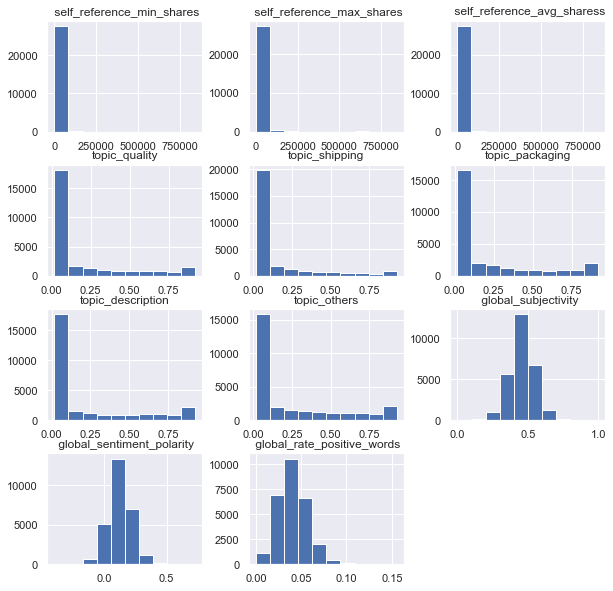

In [183]:
#Histograms 

dfH.iloc[:,12:25].hist(figsize=(10,10))

<AxesSubplot:>

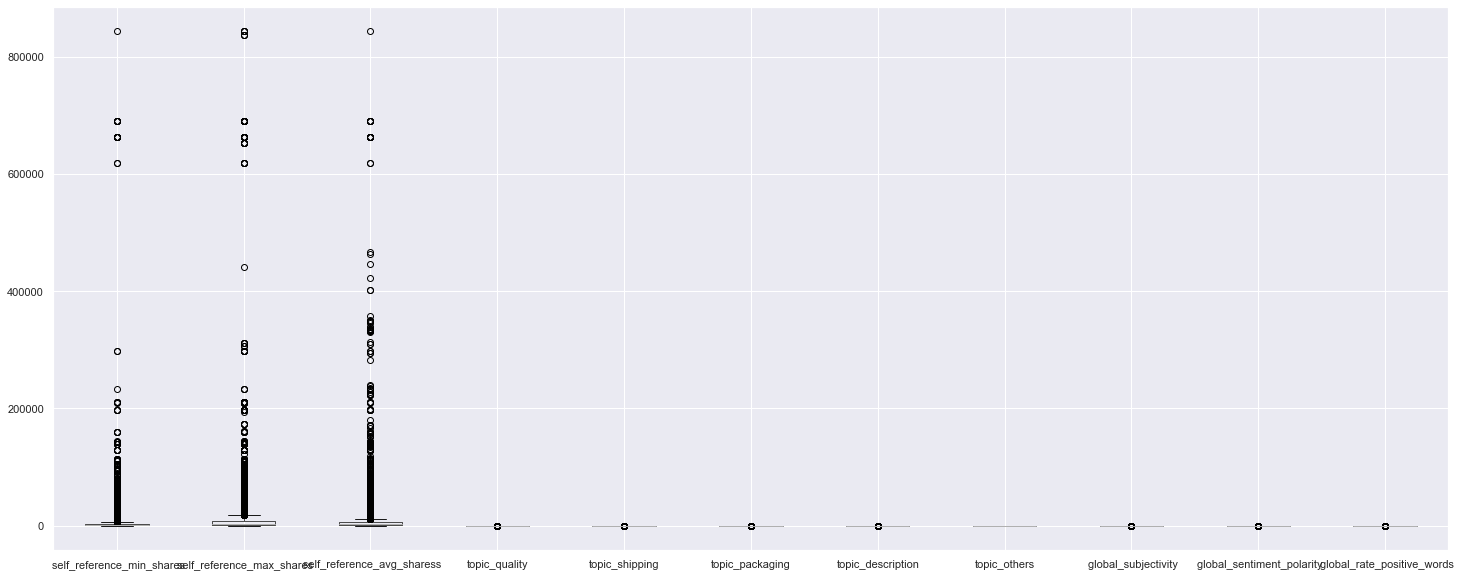

In [184]:
#Boxplot

sns.set(rc={'figure.figsize':(25,10)})
dfH.iloc[:,12:25].boxplot()

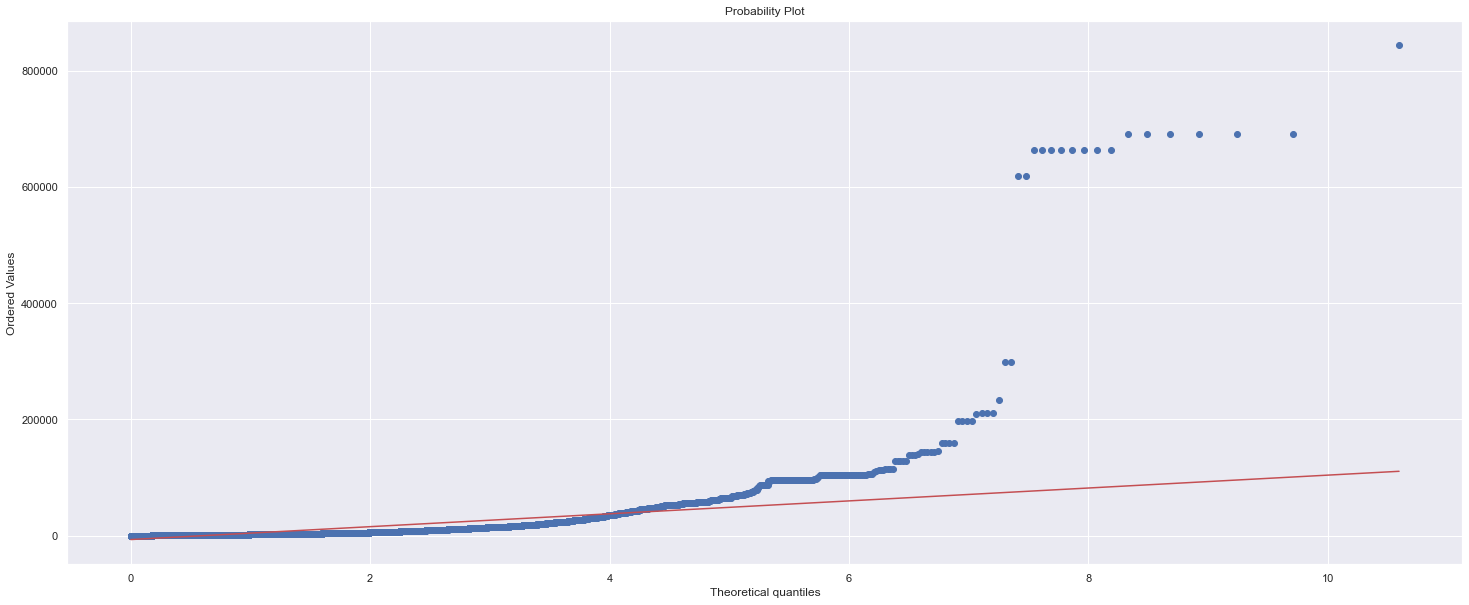

In [185]:
stats.probplot(dfH[' self_reference_min_shares'], dist="expon", plot=pylab)
pylab.show()

In [28]:
dfI=dfH[dfH[' self_reference_min_shares']<60000]
dfI

age_days   n_tokens_title   n_tokens_review   n_unique_tokens  \
0           436                9               532          0.462264   
1           185               16              1012          0.446247   
2           210               12               506          0.546559   
3           723               11               241          0.543933   
4           345               11               983          0.405930   
...         ...              ...               ...               ...   
27994       609                9               313          0.734266   
27996       428                8               206          0.647059   
27997        93               11              1083          0.535104   
27998        90               12               817          0.452229   
27999       681               13              1239          0.382686   

        n_non_stop_words   n_non_stop_unique_tokens   num_hrefs  \
0                    1.0                   0.594427           7   
1                    1.0                   0.638112           4   
2                    1.0                   0.693291           8   
3                    1.0                   0.648649           5   
4                    1.0                   0.594747          11   
...                  ...                        ...         ...   
27994                1.0                   0.839378           4   
27996                1.0                   0.851240           5   
27997                1.0                   0.712627          32   
27998                1.0                   0.585170          12   
27999                1.0                   0.537212          12   

        num_self_hrefs   num_imgs   num_videos  ...   min_positive_polarity  \
0                    7          1            0  ...                0.136364   
1                    2          3           11  ...                0.100000   
2                    3          2            1  ...                0.050000   
3                    4          1            1  ...                0.136364   
4                    7          1            1  ...                0.100000   
...                ...        ...          ...  ...                     ...   
27994                3          0           21  ...                0.062500   
27996                3          0            1  ...                0.100000   
27997               27         11            1  ...                0.100000   
27998                0          2            0  ...                0.100000   
27999               10         10            1  ...                0.033333   

        max_positive_polarity  avg_negative_polarity   min_negative_polarity  \
0                         1.0              -0.180556                 -0.2500   
1                         0.9              -0.318981                 -1.0000   
2                         0.5              -0.292708                 -0.7500   
3                         0.7               0.000000                  0.0000   
4                         1.0              -0.256481                 -0.8000   
...                       ...                    ...                     ...   
27994                     1.0              -0.325516                 -0.6000   
27996                     0.5              -0.622222                 -1.0000   
27997                     1.0              -0.404306                 -1.0000   
27998                     0.7              -0.288889                 -0.9000   
27999                     1.0              -0.128770                 -0.1875   

        max_negative_polarity   title_subjectivity  title_sentiment_polarity  \
0                   -0.125000             0.500000                  0.500000   
1                   -0.050000             0.050000                 -0.075000   
2                   -0.100000             0.000000                  0.000000   
3                    0.000000             0.000000                  0.000000   
4                   -0.0500

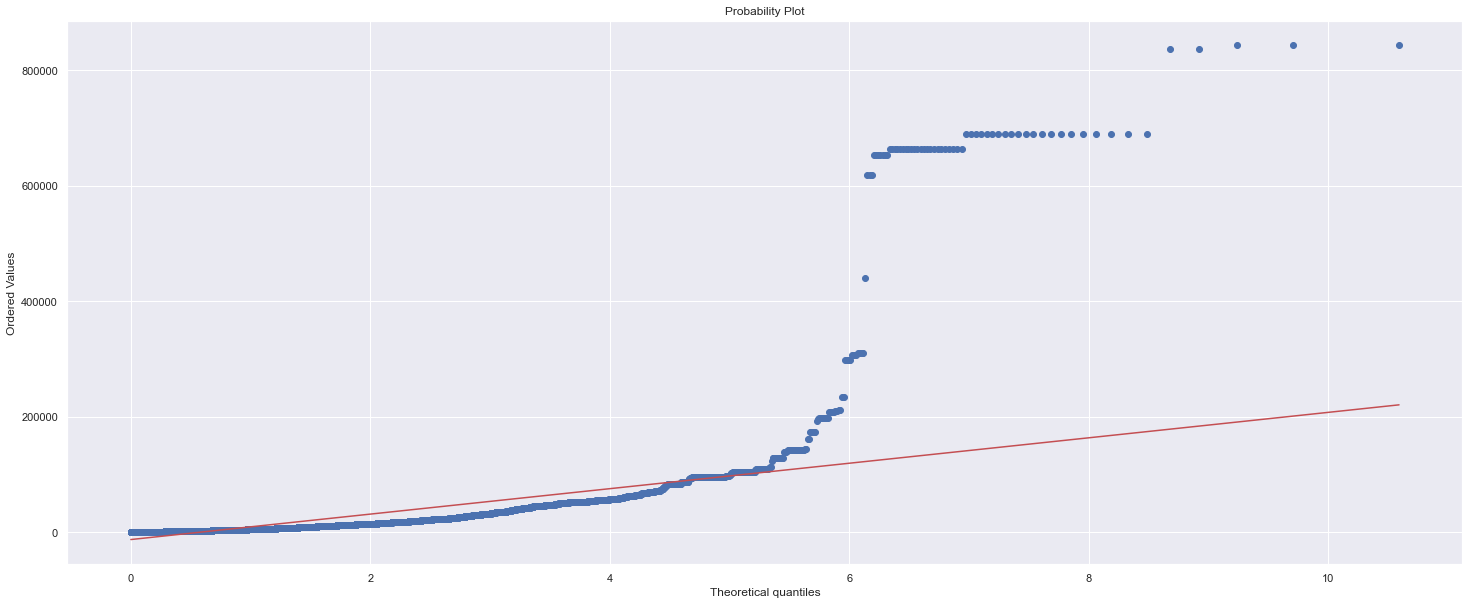

In [187]:
stats.probplot(dfI[' self_reference_max_shares'], dist="expon", plot=pylab)
pylab.show()

In [29]:
dfL=dfI[dfI[' self_reference_max_shares']<60000]
dfL

age_days   n_tokens_title   n_tokens_review   n_unique_tokens  \
0           436                9               532          0.462264   
1           185               16              1012          0.446247   
2           210               12               506          0.546559   
3           723               11               241          0.543933   
4           345               11               983          0.405930   
...         ...              ...               ...               ...   
27994       609                9               313          0.734266   
27996       428                8               206          0.647059   
27997        93               11              1083          0.535104   
27998        90               12               817          0.452229   
27999       681               13              1239          0.382686   

        n_non_stop_words   n_non_stop_unique_tokens   num_hrefs  \
0                    1.0                   0.594427           7   
1                    1.0                   0.638112           4   
2                    1.0                   0.693291           8   
3                    1.0                   0.648649           5   
4                    1.0                   0.594747          11   
...                  ...                        ...         ...   
27994                1.0                   0.839378           4   
27996                1.0                   0.851240           5   
27997                1.0                   0.712627          32   
27998                1.0                   0.585170          12   
27999                1.0                   0.537212          12   

        num_self_hrefs   num_imgs   num_videos  ...   min_positive_polarity  \
0                    7          1            0  ...                0.136364   
1                    2          3           11  ...                0.100000   
2                    3          2            1  ...                0.050000   
3                    4          1            1  ...                0.136364   
4                    7          1            1  ...                0.100000   
...                ...        ...          ...  ...                     ...   
27994                3          0           21  ...                0.062500   
27996                3          0            1  ...                0.100000   
27997               27         11            1  ...                0.100000   
27998                0          2            0  ...                0.100000   
27999               10         10            1  ...                0.033333   

        max_positive_polarity  avg_negative_polarity   min_negative_polarity  \
0                         1.0              -0.180556                 -0.2500   
1                         0.9              -0.318981                 -1.0000   
2                         0.5              -0.292708                 -0.7500   
3                         0.7               0.000000                  0.0000   
4                         1.0              -0.256481                 -0.8000   
...                       ...                    ...                     ...   
27994                     1.0              -0.325516                 -0.6000   
27996                     0.5              -0.622222                 -1.0000   
27997                     1.0              -0.404306                 -1.0000   
27998                     0.7              -0.288889                 -0.9000   
27999                     1.0              -0.128770                 -0.1875   

        max_negative_polarity   title_subjectivity  title_sentiment_polarity  \
0                   -0.125000             0.500000                  0.500000   
1                   -0.050000             0.050000                 -0.075000   
2                   -0.100000             0.000000                  0.000000   
3                    0.000000             0.000000                  0.000000   
4                   -0.0500

In [30]:
dfM=dfL[dfL[' self_reference_avg_sharess']<60000]
dfM

age_days   n_tokens_title   n_tokens_review   n_unique_tokens  \
0           436                9               532          0.462264   
1           185               16              1012          0.446247   
2           210               12               506          0.546559   
3           723               11               241          0.543933   
4           345               11               983          0.405930   
...         ...              ...               ...               ...   
27994       609                9               313          0.734266   
27996       428                8               206          0.647059   
27997        93               11              1083          0.535104   
27998        90               12               817          0.452229   
27999       681               13              1239          0.382686   

        n_non_stop_words   n_non_stop_unique_tokens   num_hrefs  \
0                    1.0                   0.594427           7   
1                    1.0                   0.638112           4   
2                    1.0                   0.693291           8   
3                    1.0                   0.648649           5   
4                    1.0                   0.594747          11   
...                  ...                        ...         ...   
27994                1.0                   0.839378           4   
27996                1.0                   0.851240           5   
27997                1.0                   0.712627          32   
27998                1.0                   0.585170          12   
27999                1.0                   0.537212          12   

        num_self_hrefs   num_imgs   num_videos  ...   min_positive_polarity  \
0                    7          1            0  ...                0.136364   
1                    2          3           11  ...                0.100000   
2                    3          2            1  ...                0.050000   
3                    4          1            1  ...                0.136364   
4                    7          1            1  ...                0.100000   
...                ...        ...          ...  ...                     ...   
27994                3          0           21  ...                0.062500   
27996                3          0            1  ...                0.100000   
27997               27         11            1  ...                0.100000   
27998                0          2            0  ...                0.100000   
27999               10         10            1  ...                0.033333   

        max_positive_polarity  avg_negative_polarity   min_negative_polarity  \
0                         1.0              -0.180556                 -0.2500   
1                         0.9              -0.318981                 -1.0000   
2                         0.5              -0.292708                 -0.7500   
3                         0.7               0.000000                  0.0000   
4                         1.0              -0.256481                 -0.8000   
...                       ...                    ...                     ...   
27994                     1.0              -0.325516                 -0.6000   
27996                     0.5              -0.622222                 -1.0000   
27997                     1.0              -0.404306                 -1.0000   
27998                     0.7              -0.288889                 -0.9000   
27999                     1.0              -0.128770                 -0.1875   

        max_negative_polarity   title_subjectivity  title_sentiment_polarity  \
0                   -0.125000             0.500000                  0.500000   
1                   -0.050000             0.050000                 -0.075000   
2                   -0.100000             0.000000                  0.000000   
3                    0.000000             0.000000                  0.000000   
4                   -0.0500

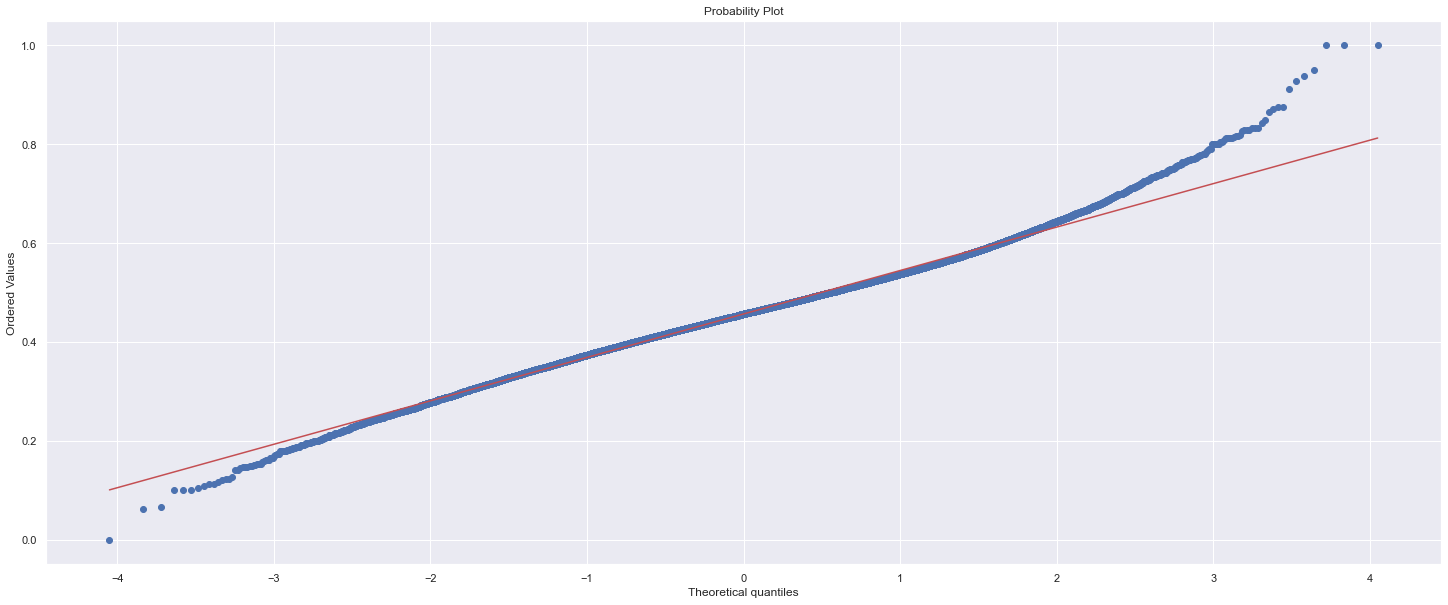

In [29]:
import pylab 
stats.probplot(dfM[' global_subjectivity'], dist="norm", plot=pylab)
pylab.show()

In [31]:
dfN=dfM[dfM[' global_subjectivity']<0.87]
dfN

age_days   n_tokens_title   n_tokens_review   n_unique_tokens  \
0           436                9               532          0.462264   
1           185               16              1012          0.446247   
2           210               12               506          0.546559   
3           723               11               241          0.543933   
4           345               11               983          0.405930   
...         ...              ...               ...               ...   
27994       609                9               313          0.734266   
27996       428                8               206          0.647059   
27997        93               11              1083          0.535104   
27998        90               12               817          0.452229   
27999       681               13              1239          0.382686   

        n_non_stop_words   n_non_stop_unique_tokens   num_hrefs  \
0                    1.0                   0.594427           7   
1                    1.0                   0.638112           4   
2                    1.0                   0.693291           8   
3                    1.0                   0.648649           5   
4                    1.0                   0.594747          11   
...                  ...                        ...         ...   
27994                1.0                   0.839378           4   
27996                1.0                   0.851240           5   
27997                1.0                   0.712627          32   
27998                1.0                   0.585170          12   
27999                1.0                   0.537212          12   

        num_self_hrefs   num_imgs   num_videos  ...   min_positive_polarity  \
0                    7          1            0  ...                0.136364   
1                    2          3           11  ...                0.100000   
2                    3          2            1  ...                0.050000   
3                    4          1            1  ...                0.136364   
4                    7          1            1  ...                0.100000   
...                ...        ...          ...  ...                     ...   
27994                3          0           21  ...                0.062500   
27996                3          0            1  ...                0.100000   
27997               27         11            1  ...                0.100000   
27998                0          2            0  ...                0.100000   
27999               10         10            1  ...                0.033333   

        max_positive_polarity  avg_negative_polarity   min_negative_polarity  \
0                         1.0              -0.180556                 -0.2500   
1                         0.9              -0.318981                 -1.0000   
2                         0.5              -0.292708                 -0.7500   
3                         0.7               0.000000                  0.0000   
4                         1.0              -0.256481                 -0.8000   
...                       ...                    ...                     ...   
27994                     1.0              -0.325516                 -0.6000   
27996                     0.5              -0.622222                 -1.0000   
27997                     1.0              -0.404306                 -1.0000   
27998                     0.7              -0.288889                 -0.9000   
27999                     1.0              -0.128770                 -0.1875   

        max_negative_polarity   title_subjectivity  title_sentiment_polarity  \
0                   -0.125000             0.500000                  0.500000   
1                   -0.050000             0.050000                 -0.075000   
2                   -0.100000             0.000000                  0.000000   
3                    0.000000             0.000000                  0.000000   
4                   -0.0500

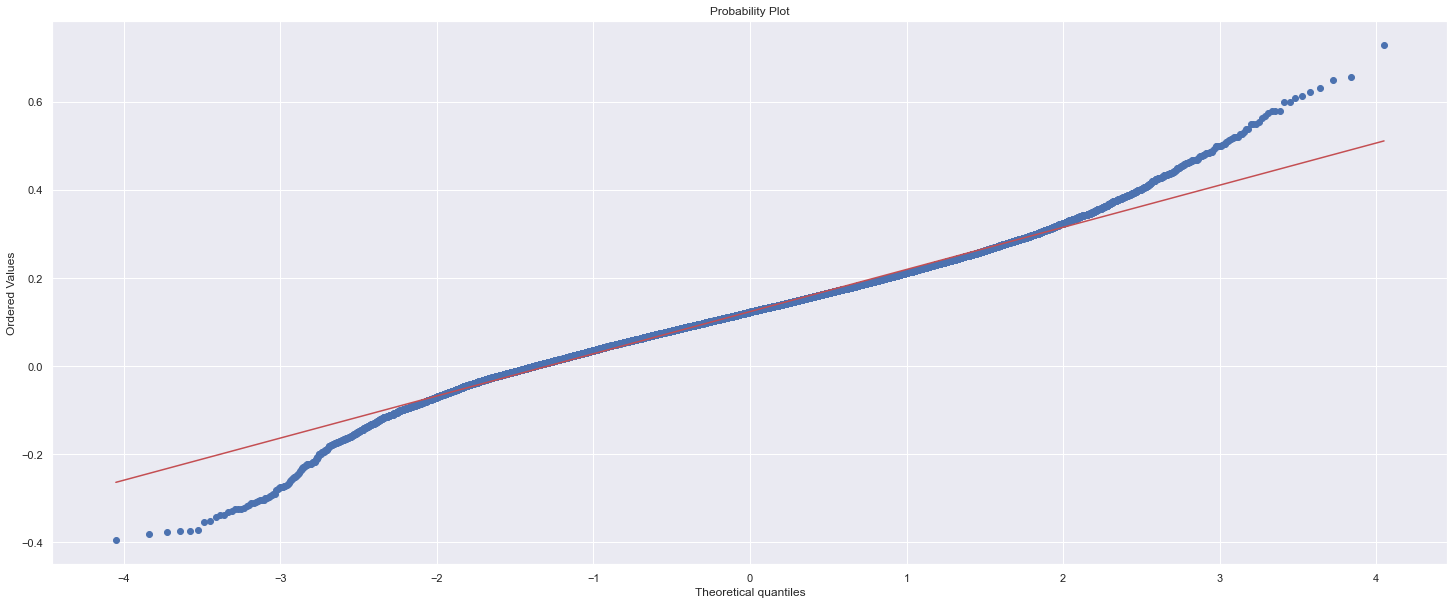

In [192]:
stats.probplot(dfN[' global_sentiment_polarity'], dist="norm", plot=pylab)
pylab.show()

In [32]:
dfO=dfN[dfN[' global_sentiment_polarity']>-0.3]
dfO=dfO[dfO[' global_sentiment_polarity']<0.6]
dfO

age_days   n_tokens_title   n_tokens_review   n_unique_tokens  \
0           436                9               532          0.462264   
1           185               16              1012          0.446247   
2           210               12               506          0.546559   
3           723               11               241          0.543933   
4           345               11               983          0.405930   
...         ...              ...               ...               ...   
27994       609                9               313          0.734266   
27996       428                8               206          0.647059   
27997        93               11              1083          0.535104   
27998        90               12               817          0.452229   
27999       681               13              1239          0.382686   

        n_non_stop_words   n_non_stop_unique_tokens   num_hrefs  \
0                    1.0                   0.594427           7   
1                    1.0                   0.638112           4   
2                    1.0                   0.693291           8   
3                    1.0                   0.648649           5   
4                    1.0                   0.594747          11   
...                  ...                        ...         ...   
27994                1.0                   0.839378           4   
27996                1.0                   0.851240           5   
27997                1.0                   0.712627          32   
27998                1.0                   0.585170          12   
27999                1.0                   0.537212          12   

        num_self_hrefs   num_imgs   num_videos  ...   min_positive_polarity  \
0                    7          1            0  ...                0.136364   
1                    2          3           11  ...                0.100000   
2                    3          2            1  ...                0.050000   
3                    4          1            1  ...                0.136364   
4                    7          1            1  ...                0.100000   
...                ...        ...          ...  ...                     ...   
27994                3          0           21  ...                0.062500   
27996                3          0            1  ...                0.100000   
27997               27         11            1  ...                0.100000   
27998                0          2            0  ...                0.100000   
27999               10         10            1  ...                0.033333   

        max_positive_polarity  avg_negative_polarity   min_negative_polarity  \
0                         1.0              -0.180556                 -0.2500   
1                         0.9              -0.318981                 -1.0000   
2                         0.5              -0.292708                 -0.7500   
3                         0.7               0.000000                  0.0000   
4                         1.0              -0.256481                 -0.8000   
...                       ...                    ...                     ...   
27994                     1.0              -0.325516                 -0.6000   
27996                     0.5              -0.622222                 -1.0000   
27997                     1.0              -0.404306                 -1.0000   
27998                     0.7              -0.288889                 -0.9000   
27999                     1.0              -0.128770                 -0.1875   

        max_negative_polarity   title_subjectivity  title_sentiment_polarity  \
0                   -0.125000             0.500000                  0.500000   
1                   -0.050000             0.050000                 -0.075000   
2                   -0.100000             0.000000                  0.000000   
3                    0.000000             0.000000                  0.000000   
4                   -0.0500

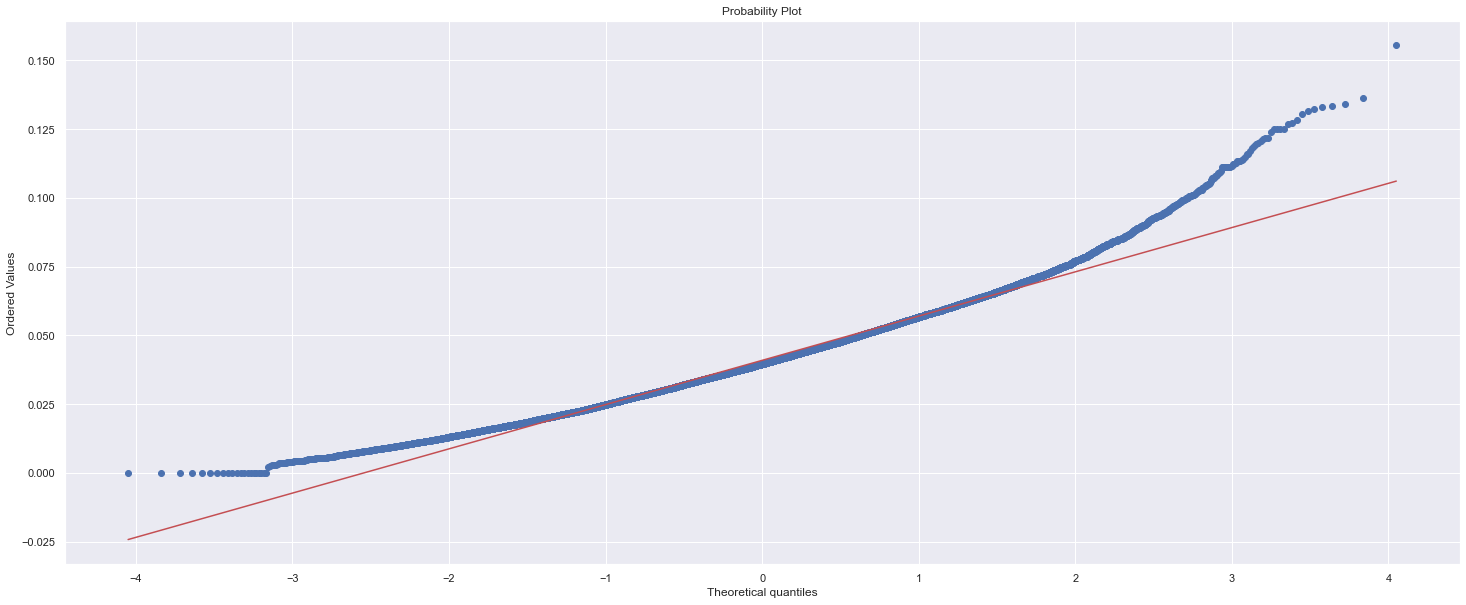

In [194]:
stats.probplot(dfO[' global_rate_positive_words'], dist="norm", plot=pylab)
pylab.show()

In [33]:
dfP=dfO[dfO[' global_rate_positive_words']<=0.125]
dfP

age_days   n_tokens_title   n_tokens_review   n_unique_tokens  \
0           436                9               532          0.462264   
1           185               16              1012          0.446247   
2           210               12               506          0.546559   
3           723               11               241          0.543933   
4           345               11               983          0.405930   
...         ...              ...               ...               ...   
27994       609                9               313          0.734266   
27996       428                8               206          0.647059   
27997        93               11              1083          0.535104   
27998        90               12               817          0.452229   
27999       681               13              1239          0.382686   

        n_non_stop_words   n_non_stop_unique_tokens   num_hrefs  \
0                    1.0                   0.594427           7   
1                    1.0                   0.638112           4   
2                    1.0                   0.693291           8   
3                    1.0                   0.648649           5   
4                    1.0                   0.594747          11   
...                  ...                        ...         ...   
27994                1.0                   0.839378           4   
27996                1.0                   0.851240           5   
27997                1.0                   0.712627          32   
27998                1.0                   0.585170          12   
27999                1.0                   0.537212          12   

        num_self_hrefs   num_imgs   num_videos  ...   min_positive_polarity  \
0                    7          1            0  ...                0.136364   
1                    2          3           11  ...                0.100000   
2                    3          2            1  ...                0.050000   
3                    4          1            1  ...                0.136364   
4                    7          1            1  ...                0.100000   
...                ...        ...          ...  ...                     ...   
27994                3          0           21  ...                0.062500   
27996                3          0            1  ...                0.100000   
27997               27         11            1  ...                0.100000   
27998                0          2            0  ...                0.100000   
27999               10         10            1  ...                0.033333   

        max_positive_polarity  avg_negative_polarity   min_negative_polarity  \
0                         1.0              -0.180556                 -0.2500   
1                         0.9              -0.318981                 -1.0000   
2                         0.5              -0.292708                 -0.7500   
3                         0.7               0.000000                  0.0000   
4                         1.0              -0.256481                 -0.8000   
...                       ...                    ...                     ...   
27994                     1.0              -0.325516                 -0.6000   
27996                     0.5              -0.622222                 -1.0000   
27997                     1.0              -0.404306                 -1.0000   
27998                     0.7              -0.288889                 -0.9000   
27999                     1.0              -0.128770                 -0.1875   

        max_negative_polarity   title_subjectivity  title_sentiment_polarity  \
0                   -0.125000             0.500000                  0.500000   
1                   -0.050000             0.050000                 -0.075000   
2                   -0.100000             0.000000                  0.000000   
3                    0.000000             0.000000                  0.000000   
4                   -0.0500

array([[<AxesSubplot:title={'center':' global_rate_negative_words'}>,
        <AxesSubplot:title={'center':' rate_positive_words'}>,
        <AxesSubplot:title={'center':' rate_negative_words'}>,
        <AxesSubplot:title={'center':' avg_positive_polarity'}>],
       [<AxesSubplot:title={'center':' min_positive_polarity'}>,
        <AxesSubplot:title={'center':' max_positive_polarity'}>,
        <AxesSubplot:title={'center':' avg_negative_polarity'}>,
        <AxesSubplot:title={'center':' min_negative_polarity'}>],
       [<AxesSubplot:title={'center':' max_negative_polarity'}>,
        <AxesSubplot:title={'center':' title_subjectivity'}>,
        <AxesSubplot:title={'center':' title_sentiment_polarity'}>,
        <AxesSubplot:title={'center':' abs_title_subjectivity'}>],
       [<AxesSubplot:title={'center':' abs_title_sentiment_polarity'}>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

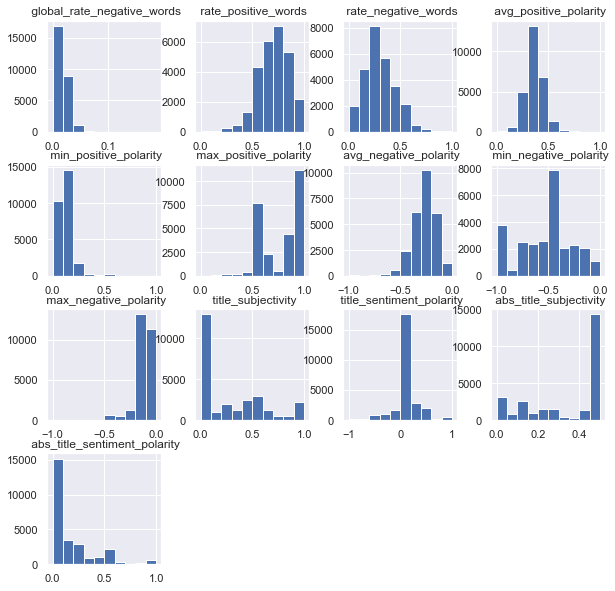

In [197]:
dfP.iloc[:,25:38].hist(figsize=(10,10))

<AxesSubplot:>

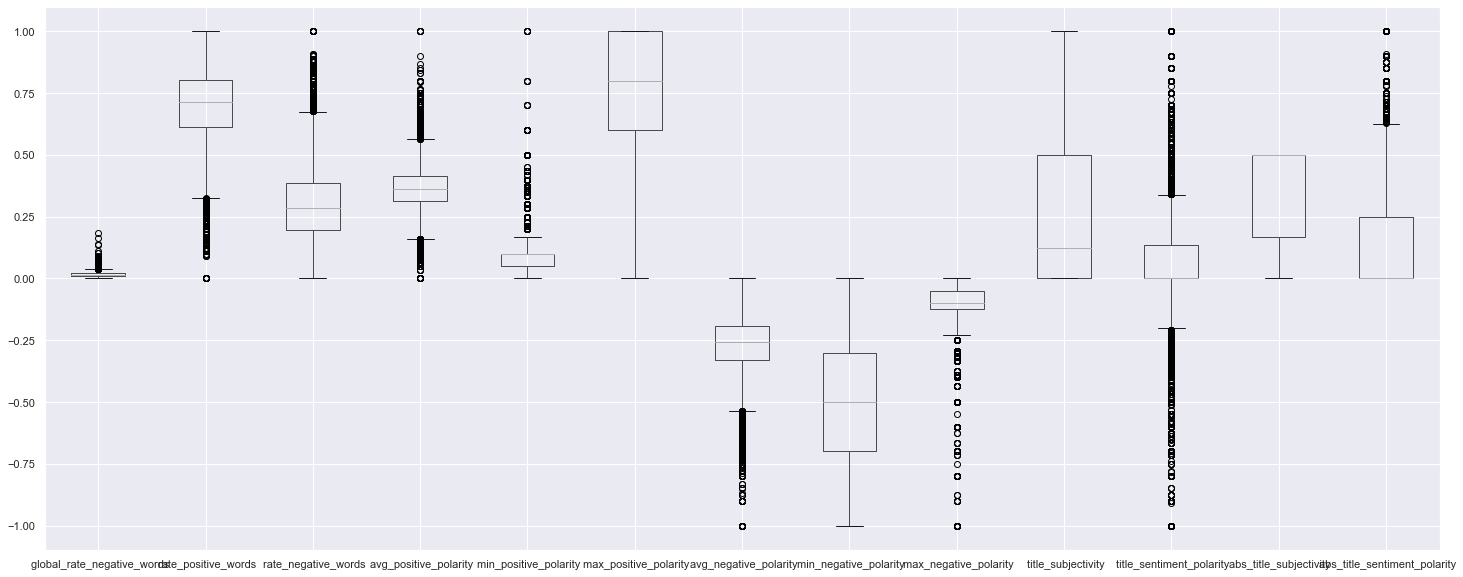

In [50]:
dfP.iloc[:,25:38].boxplot()

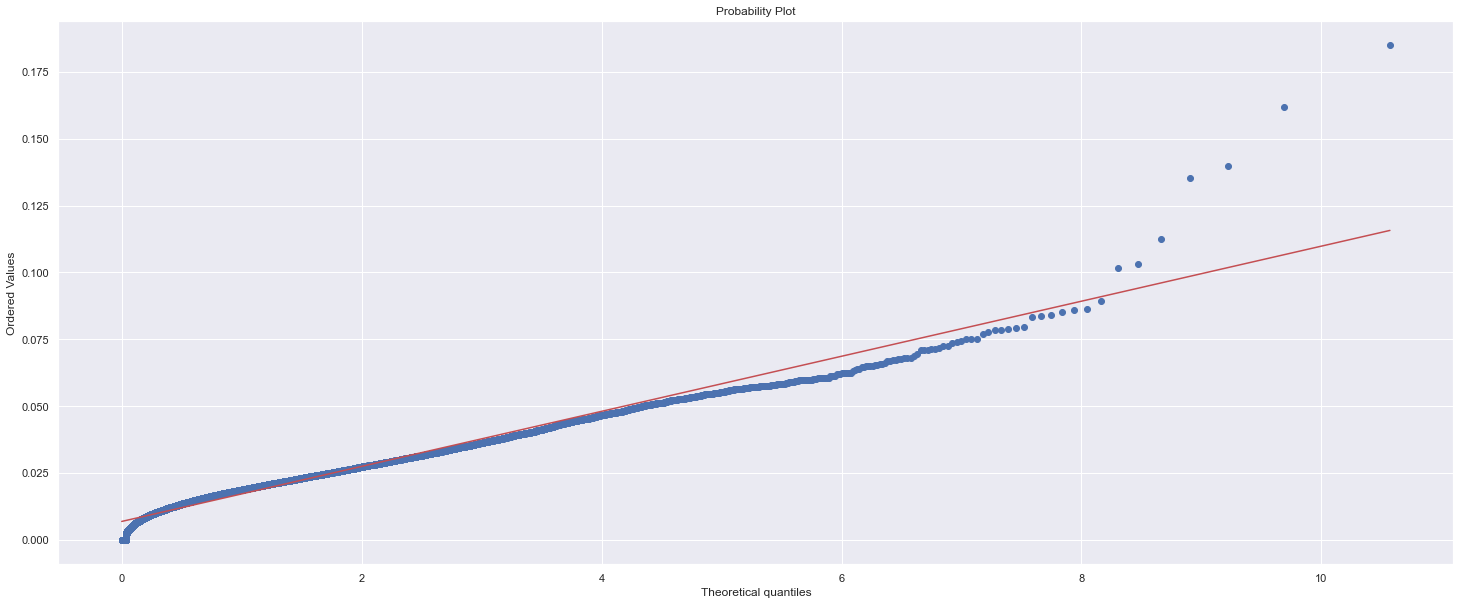

In [198]:
stats.probplot(dfP[' global_rate_negative_words'], dist="expon", plot=pylab)
pylab.show()

In [34]:
dfQ=dfP[dfP[' global_rate_negative_words']<=0.125]
dfQ

age_days   n_tokens_title   n_tokens_review   n_unique_tokens  \
0           436                9               532          0.462264   
1           185               16              1012          0.446247   
2           210               12               506          0.546559   
3           723               11               241          0.543933   
4           345               11               983          0.405930   
...         ...              ...               ...               ...   
27994       609                9               313          0.734266   
27996       428                8               206          0.647059   
27997        93               11              1083          0.535104   
27998        90               12               817          0.452229   
27999       681               13              1239          0.382686   

        n_non_stop_words   n_non_stop_unique_tokens   num_hrefs  \
0                    1.0                   0.594427           7   
1                    1.0                   0.638112           4   
2                    1.0                   0.693291           8   
3                    1.0                   0.648649           5   
4                    1.0                   0.594747          11   
...                  ...                        ...         ...   
27994                1.0                   0.839378           4   
27996                1.0                   0.851240           5   
27997                1.0                   0.712627          32   
27998                1.0                   0.585170          12   
27999                1.0                   0.537212          12   

        num_self_hrefs   num_imgs   num_videos  ...   min_positive_polarity  \
0                    7          1            0  ...                0.136364   
1                    2          3           11  ...                0.100000   
2                    3          2            1  ...                0.050000   
3                    4          1            1  ...                0.136364   
4                    7          1            1  ...                0.100000   
...                ...        ...          ...  ...                     ...   
27994                3          0           21  ...                0.062500   
27996                3          0            1  ...                0.100000   
27997               27         11            1  ...                0.100000   
27998                0          2            0  ...                0.100000   
27999               10         10            1  ...                0.033333   

        max_positive_polarity  avg_negative_polarity   min_negative_polarity  \
0                         1.0              -0.180556                 -0.2500   
1                         0.9              -0.318981                 -1.0000   
2                         0.5              -0.292708                 -0.7500   
3                         0.7               0.000000                  0.0000   
4                         1.0              -0.256481                 -0.8000   
...                       ...                    ...                     ...   
27994                     1.0              -0.325516                 -0.6000   
27996                     0.5              -0.622222                 -1.0000   
27997                     1.0              -0.404306                 -1.0000   
27998                     0.7              -0.288889                 -0.9000   
27999                     1.0              -0.128770                 -0.1875   

        max_negative_polarity   title_subjectivity  title_sentiment_polarity  \
0                   -0.125000             0.500000                  0.500000   
1                   -0.050000             0.050000                 -0.075000   
2                   -0.100000             0.000000                  0.000000   
3                    0.000000             0.000000                  0.000000   
4                   -0.0500

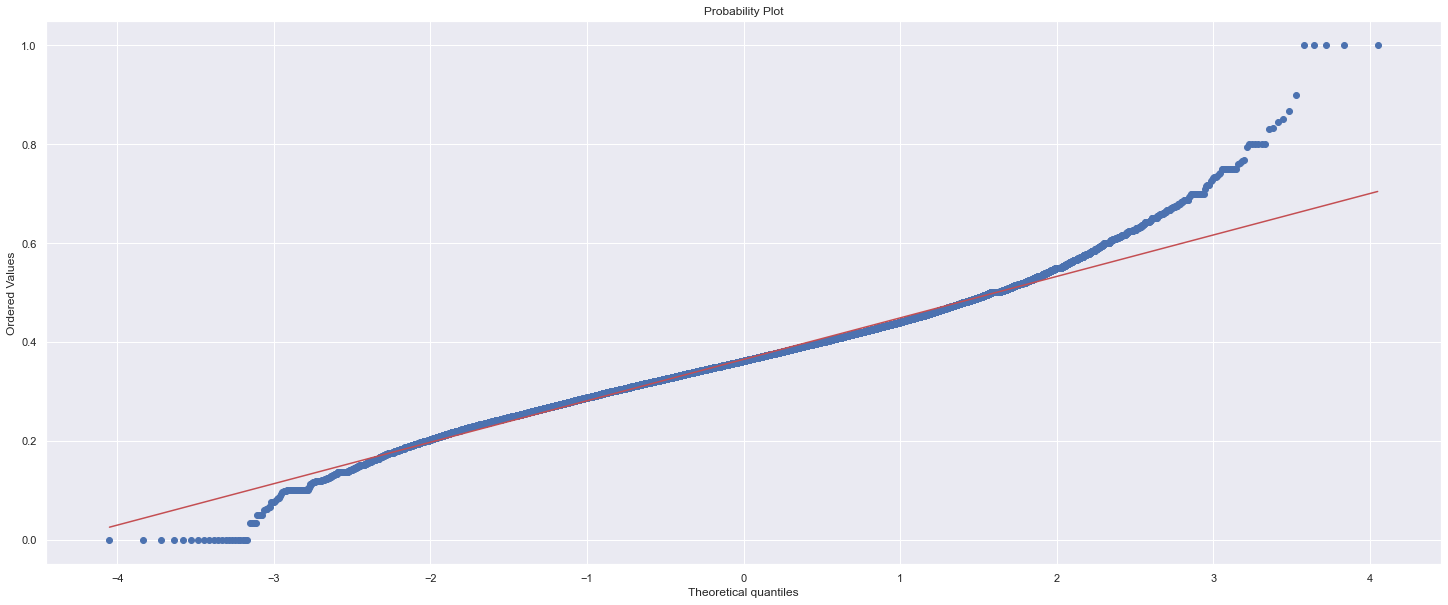

In [200]:
stats.probplot(dfQ[' avg_positive_polarity'], dist="norm", plot=pylab)
pylab.show()


In [35]:
dfR=dfQ[dfQ[' avg_positive_polarity']<0.8]
dfR

age_days   n_tokens_title   n_tokens_review   n_unique_tokens  \
0           436                9               532          0.462264   
1           185               16              1012          0.446247   
2           210               12               506          0.546559   
3           723               11               241          0.543933   
4           345               11               983          0.405930   
...         ...              ...               ...               ...   
27994       609                9               313          0.734266   
27996       428                8               206          0.647059   
27997        93               11              1083          0.535104   
27998        90               12               817          0.452229   
27999       681               13              1239          0.382686   

        n_non_stop_words   n_non_stop_unique_tokens   num_hrefs  \
0                    1.0                   0.594427           7   
1                    1.0                   0.638112           4   
2                    1.0                   0.693291           8   
3                    1.0                   0.648649           5   
4                    1.0                   0.594747          11   
...                  ...                        ...         ...   
27994                1.0                   0.839378           4   
27996                1.0                   0.851240           5   
27997                1.0                   0.712627          32   
27998                1.0                   0.585170          12   
27999                1.0                   0.537212          12   

        num_self_hrefs   num_imgs   num_videos  ...   min_positive_polarity  \
0                    7          1            0  ...                0.136364   
1                    2          3           11  ...                0.100000   
2                    3          2            1  ...                0.050000   
3                    4          1            1  ...                0.136364   
4                    7          1            1  ...                0.100000   
...                ...        ...          ...  ...                     ...   
27994                3          0           21  ...                0.062500   
27996                3          0            1  ...                0.100000   
27997               27         11            1  ...                0.100000   
27998                0          2            0  ...                0.100000   
27999               10         10            1  ...                0.033333   

        max_positive_polarity  avg_negative_polarity   min_negative_polarity  \
0                         1.0              -0.180556                 -0.2500   
1                         0.9              -0.318981                 -1.0000   
2                         0.5              -0.292708                 -0.7500   
3                         0.7               0.000000                  0.0000   
4                         1.0              -0.256481                 -0.8000   
...                       ...                    ...                     ...   
27994                     1.0              -0.325516                 -0.6000   
27996                     0.5              -0.622222                 -1.0000   
27997                     1.0              -0.404306                 -1.0000   
27998                     0.7              -0.288889                 -0.9000   
27999                     1.0              -0.128770                 -0.1875   

        max_negative_polarity   title_subjectivity  title_sentiment_polarity  \
0                   -0.125000             0.500000                  0.500000   
1                   -0.050000             0.050000                 -0.075000   
2                   -0.100000             0.000000                  0.000000   
3                    0.000000             0.000000                  0.000000   
4                   -0.0500

In [36]:
dfS=dfR[dfR[' min_positive_polarity']<0.6]
dfS

age_days   n_tokens_title   n_tokens_review   n_unique_tokens  \
0           436                9               532          0.462264   
1           185               16              1012          0.446247   
2           210               12               506          0.546559   
3           723               11               241          0.543933   
4           345               11               983          0.405930   
...         ...              ...               ...               ...   
27994       609                9               313          0.734266   
27996       428                8               206          0.647059   
27997        93               11              1083          0.535104   
27998        90               12               817          0.452229   
27999       681               13              1239          0.382686   

        n_non_stop_words   n_non_stop_unique_tokens   num_hrefs  \
0                    1.0                   0.594427           7   
1                    1.0                   0.638112           4   
2                    1.0                   0.693291           8   
3                    1.0                   0.648649           5   
4                    1.0                   0.594747          11   
...                  ...                        ...         ...   
27994                1.0                   0.839378           4   
27996                1.0                   0.851240           5   
27997                1.0                   0.712627          32   
27998                1.0                   0.585170          12   
27999                1.0                   0.537212          12   

        num_self_hrefs   num_imgs   num_videos  ...   min_positive_polarity  \
0                    7          1            0  ...                0.136364   
1                    2          3           11  ...                0.100000   
2                    3          2            1  ...                0.050000   
3                    4          1            1  ...                0.136364   
4                    7          1            1  ...                0.100000   
...                ...        ...          ...  ...                     ...   
27994                3          0           21  ...                0.062500   
27996                3          0            1  ...                0.100000   
27997               27         11            1  ...                0.100000   
27998                0          2            0  ...                0.100000   
27999               10         10            1  ...                0.033333   

        max_positive_polarity  avg_negative_polarity   min_negative_polarity  \
0                         1.0              -0.180556                 -0.2500   
1                         0.9              -0.318981                 -1.0000   
2                         0.5              -0.292708                 -0.7500   
3                         0.7               0.000000                  0.0000   
4                         1.0              -0.256481                 -0.8000   
...                       ...                    ...                     ...   
27994                     1.0              -0.325516                 -0.6000   
27996                     0.5              -0.622222                 -1.0000   
27997                     1.0              -0.404306                 -1.0000   
27998                     0.7              -0.288889                 -0.9000   
27999                     1.0              -0.128770                 -0.1875   

        max_negative_polarity   title_subjectivity  title_sentiment_polarity  \
0                   -0.125000             0.500000                  0.500000   
1                   -0.050000             0.050000                 -0.075000   
2                   -0.100000             0.000000                  0.000000   
3                    0.000000             0.000000                  0.000000   
4                   -0.0500

<AxesSubplot:>

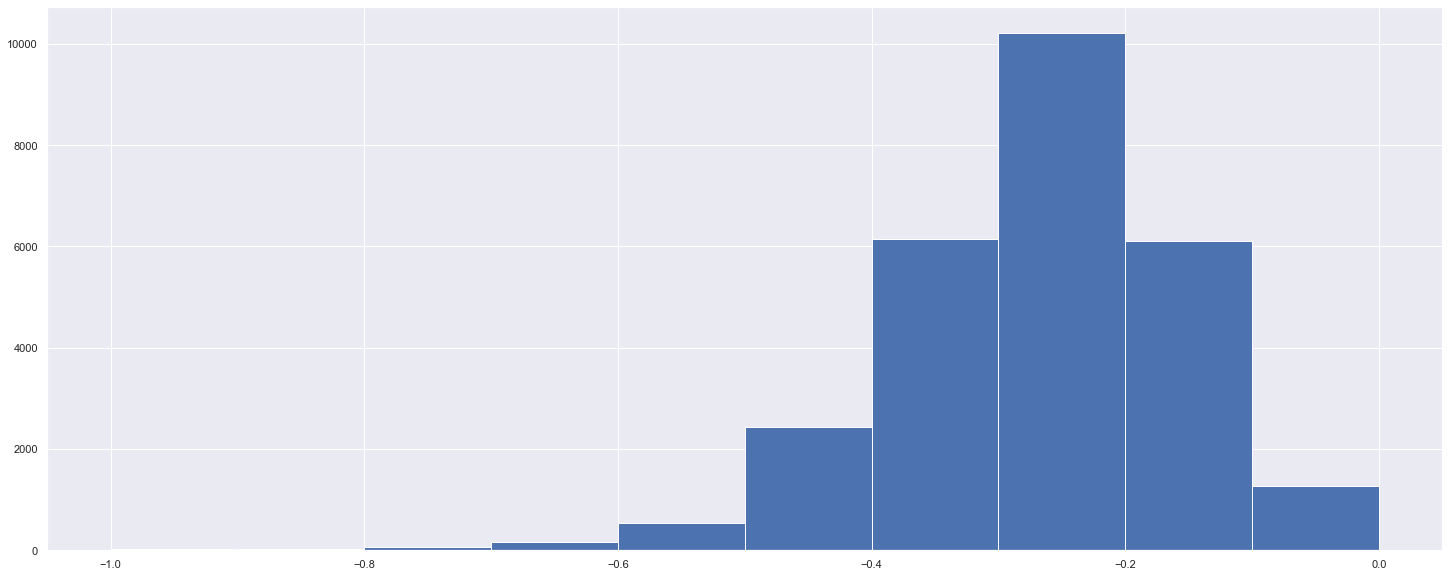

In [203]:
dfS[' avg_negative_polarity'].hist()

In [37]:
dfT=dfS[dfS[' avg_negative_polarity']> -0.9]
dfT

age_days   n_tokens_title   n_tokens_review   n_unique_tokens  \
0           436                9               532          0.462264   
1           185               16              1012          0.446247   
2           210               12               506          0.546559   
3           723               11               241          0.543933   
4           345               11               983          0.405930   
...         ...              ...               ...               ...   
27994       609                9               313          0.734266   
27996       428                8               206          0.647059   
27997        93               11              1083          0.535104   
27998        90               12               817          0.452229   
27999       681               13              1239          0.382686   

        n_non_stop_words   n_non_stop_unique_tokens   num_hrefs  \
0                    1.0                   0.594427           7   
1                    1.0                   0.638112           4   
2                    1.0                   0.693291           8   
3                    1.0                   0.648649           5   
4                    1.0                   0.594747          11   
...                  ...                        ...         ...   
27994                1.0                   0.839378           4   
27996                1.0                   0.851240           5   
27997                1.0                   0.712627          32   
27998                1.0                   0.585170          12   
27999                1.0                   0.537212          12   

        num_self_hrefs   num_imgs   num_videos  ...   min_positive_polarity  \
0                    7          1            0  ...                0.136364   
1                    2          3           11  ...                0.100000   
2                    3          2            1  ...                0.050000   
3                    4          1            1  ...                0.136364   
4                    7          1            1  ...                0.100000   
...                ...        ...          ...  ...                     ...   
27994                3          0           21  ...                0.062500   
27996                3          0            1  ...                0.100000   
27997               27         11            1  ...                0.100000   
27998                0          2            0  ...                0.100000   
27999               10         10            1  ...                0.033333   

        max_positive_polarity  avg_negative_polarity   min_negative_polarity  \
0                         1.0              -0.180556                 -0.2500   
1                         0.9              -0.318981                 -1.0000   
2                         0.5              -0.292708                 -0.7500   
3                         0.7               0.000000                  0.0000   
4                         1.0              -0.256481                 -0.8000   
...                       ...                    ...                     ...   
27994                     1.0              -0.325516                 -0.6000   
27996                     0.5              -0.622222                 -1.0000   
27997                     1.0              -0.404306                 -1.0000   
27998                     0.7              -0.288889                 -0.9000   
27999                     1.0              -0.128770                 -0.1875   

        max_negative_polarity   title_subjectivity  title_sentiment_polarity  \
0                   -0.125000             0.500000                  0.500000   
1                   -0.050000             0.050000                 -0.075000   
2                   -0.100000             0.000000                  0.000000   
3                    0.000000             0.000000                  0.000000   
4                   -0.0500

<AxesSubplot:>

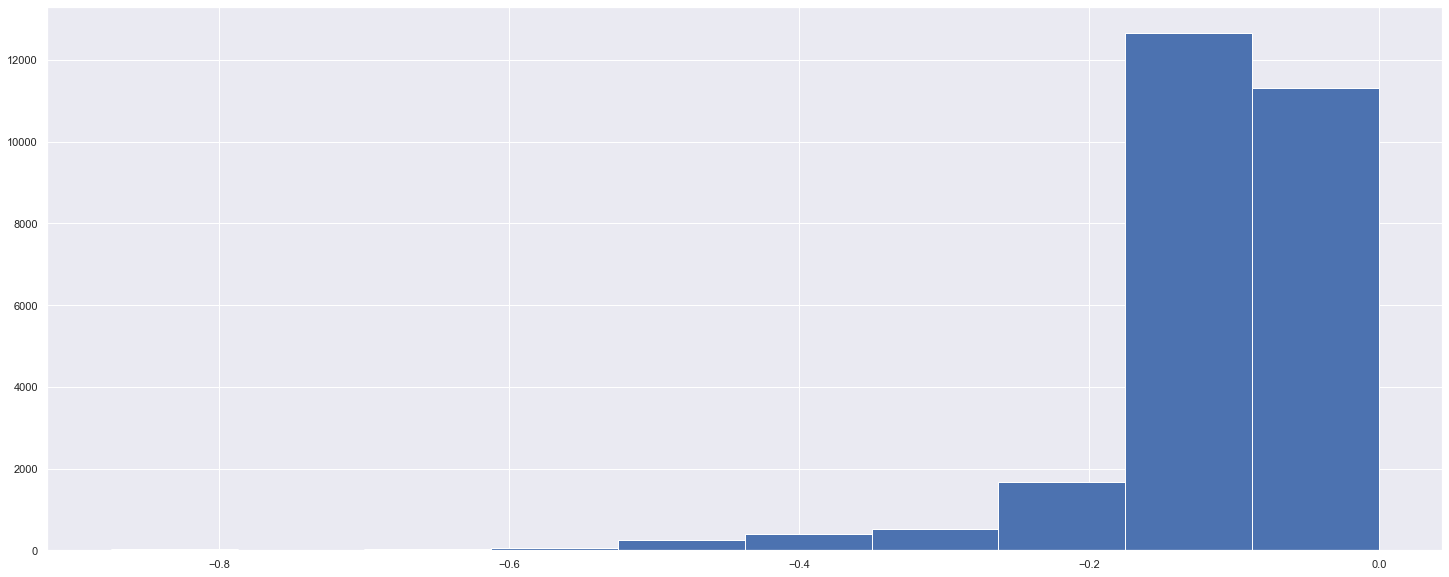

In [205]:
dfT[' max_negative_polarity'].hist()

In [38]:
dfU=dfT[dfT[' max_negative_polarity']>= -0.8]
dfU

age_days   n_tokens_title   n_tokens_review   n_unique_tokens  \
0           436                9               532          0.462264   
1           185               16              1012          0.446247   
2           210               12               506          0.546559   
3           723               11               241          0.543933   
4           345               11               983          0.405930   
...         ...              ...               ...               ...   
27994       609                9               313          0.734266   
27996       428                8               206          0.647059   
27997        93               11              1083          0.535104   
27998        90               12               817          0.452229   
27999       681               13              1239          0.382686   

        n_non_stop_words   n_non_stop_unique_tokens   num_hrefs  \
0                    1.0                   0.594427           7   
1                    1.0                   0.638112           4   
2                    1.0                   0.693291           8   
3                    1.0                   0.648649           5   
4                    1.0                   0.594747          11   
...                  ...                        ...         ...   
27994                1.0                   0.839378           4   
27996                1.0                   0.851240           5   
27997                1.0                   0.712627          32   
27998                1.0                   0.585170          12   
27999                1.0                   0.537212          12   

        num_self_hrefs   num_imgs   num_videos  ...   min_positive_polarity  \
0                    7          1            0  ...                0.136364   
1                    2          3           11  ...                0.100000   
2                    3          2            1  ...                0.050000   
3                    4          1            1  ...                0.136364   
4                    7          1            1  ...                0.100000   
...                ...        ...          ...  ...                     ...   
27994                3          0           21  ...                0.062500   
27996                3          0            1  ...                0.100000   
27997               27         11            1  ...                0.100000   
27998                0          2            0  ...                0.100000   
27999               10         10            1  ...                0.033333   

        max_positive_polarity  avg_negative_polarity   min_negative_polarity  \
0                         1.0              -0.180556                 -0.2500   
1                         0.9              -0.318981                 -1.0000   
2                         0.5              -0.292708                 -0.7500   
3                         0.7               0.000000                  0.0000   
4                         1.0              -0.256481                 -0.8000   
...                       ...                    ...                     ...   
27994                     1.0              -0.325516                 -0.6000   
27996                     0.5              -0.622222                 -1.0000   
27997                     1.0              -0.404306                 -1.0000   
27998                     0.7              -0.288889                 -0.9000   
27999                     1.0              -0.128770                 -0.1875   

        max_negative_polarity   title_subjectivity  title_sentiment_polarity  \
0                   -0.125000             0.500000                  0.500000   
1                   -0.050000             0.050000                 -0.075000   
2                   -0.100000             0.000000                  0.000000   
3                    0.000000             0.000000                  0.000000   
4                   -0.0500

In [39]:
#Drop "abs title subjectivity and "abs title sentiment polarity" since they do not add any information with respect to
# the "title subjectivity" and the "title sentiment ploarity" variables

dfU = dfU.drop(columns=' abs_title_subjectivity') 


In [40]:
dfU=dfU.drop(columns=' abs_title_sentiment_polarity')


In [41]:
dfU=dfU.reset_index(drop=True)

In [42]:
dfU

age_days   n_tokens_title   n_tokens_review   n_unique_tokens  \
0           436                9               532          0.462264   
1           185               16              1012          0.446247   
2           210               12               506          0.546559   
3           723               11               241          0.543933   
4           345               11               983          0.405930   
...         ...              ...               ...               ...   
26942       609                9               313          0.734266   
26943       428                8               206          0.647059   
26944        93               11              1083          0.535104   
26945        90               12               817          0.452229   
26946       681               13              1239          0.382686   

        n_non_stop_words   n_non_stop_unique_tokens   num_hrefs  \
0                    1.0                   0.594427           7   
1                    1.0                   0.638112           4   
2                    1.0                   0.693291           8   
3                    1.0                   0.648649           5   
4                    1.0                   0.594747          11   
...                  ...                        ...         ...   
26942                1.0                   0.839378           4   
26943                1.0                   0.851240           5   
26944                1.0                   0.712627          32   
26945                1.0                   0.585170          12   
26946                1.0                   0.537212          12   

        num_self_hrefs   num_imgs   num_videos  ...   rate_negative_words  \
0                    7          1            0  ...              0.250000   
1                    2          3           11  ...              0.352941   
2                    3          2            1  ...              0.592593   
3                    4          1            1  ...              0.000000   
4                    7          1            1  ...              0.295082   
...                ...        ...          ...  ...                   ...   
26942                3          0           21  ...              0.411765   
26943                3          0            1  ...              0.250000   
26944               27         11            1  ...              0.447761   
26945                0          2            0  ...              0.292683   
26946               10         10            1  ...              0.134328   

        avg_positive_polarity  min_positive_polarity   max_positive_polarity  \
0                    0.400505               0.136364                     1.0   
1                    0.504457               0.100000                     0.9   
2                    0.179924               0.050000                     0.5   
3                    0.345671               0.136364                     0.7   
4                    0.341548               0.100000                     1.0   
...                       ...                    ...                     ...   
26942                0.367943               0.062500                     1.0   
26943                0.342929               0.100000                     0.5   
26944                0.422991               0.100000                     1.0   
26945                0.308378               0.100000                     0.7   
26946                0.318747               0.033333                     1.0   

        avg_negative_polarity   min_negative_polarity  max_negative_polarity  \
0                   -0.180556                 -0.2500              -0.125000   
1                   -0.318981                 -1.0000              -0.050000   
2                   -0.292708                 -0.7500              -0.100000   
3                    0.000000                  0.0000               0.000000   
4                   -0.256481                 -0.80

In [43]:
#By looking at the dispersion of the points in the scatterplot it was decided to remove those observations 
#associated to a value of the transformed likes lower than 2.5.


dfU=dfU[dfU['trasflikes']>= 2.5]
dfU

age_days   n_tokens_title   n_tokens_review   n_unique_tokens  \
0           436                9               532          0.462264   
1           185               16              1012          0.446247   
2           210               12               506          0.546559   
3           723               11               241          0.543933   
4           345               11               983          0.405930   
...         ...              ...               ...               ...   
26942       609                9               313          0.734266   
26943       428                8               206          0.647059   
26944        93               11              1083          0.535104   
26945        90               12               817          0.452229   
26946       681               13              1239          0.382686   

        n_non_stop_words   n_non_stop_unique_tokens   num_hrefs  \
0                    1.0                   0.594427           7   
1                    1.0                   0.638112           4   
2                    1.0                   0.693291           8   
3                    1.0                   0.648649           5   
4                    1.0                   0.594747          11   
...                  ...                        ...         ...   
26942                1.0                   0.839378           4   
26943                1.0                   0.851240           5   
26944                1.0                   0.712627          32   
26945                1.0                   0.585170          12   
26946                1.0                   0.537212          12   

        num_self_hrefs   num_imgs   num_videos  ...   rate_negative_words  \
0                    7          1            0  ...              0.250000   
1                    2          3           11  ...              0.352941   
2                    3          2            1  ...              0.592593   
3                    4          1            1  ...              0.000000   
4                    7          1            1  ...              0.295082   
...                ...        ...          ...  ...                   ...   
26942                3          0           21  ...              0.411765   
26943                3          0            1  ...              0.250000   
26944               27         11            1  ...              0.447761   
26945                0          2            0  ...              0.292683   
26946               10         10            1  ...              0.134328   

        avg_positive_polarity  min_positive_polarity   max_positive_polarity  \
0                    0.400505               0.136364                     1.0   
1                    0.504457               0.100000                     0.9   
2                    0.179924               0.050000                     0.5   
3                    0.345671               0.136364                     0.7   
4                    0.341548               0.100000                     1.0   
...                       ...                    ...                     ...   
26942                0.367943               0.062500                     1.0   
26943                0.342929               0.100000                     0.5   
26944                0.422991               0.100000                     1.0   
26945                0.308378               0.100000                     0.7   
26946                0.318747               0.033333                     1.0   

        avg_negative_polarity   min_negative_polarity  max_negative_polarity  \
0                   -0.180556                 -0.2500              -0.125000   
1                   -0.318981                 -1.0000              -0.050000   
2                   -0.292708                 -0.7500              -0.100000   
3                    0.000000                  0.0000               0.000000   
4                   -0.256481                 -0.80

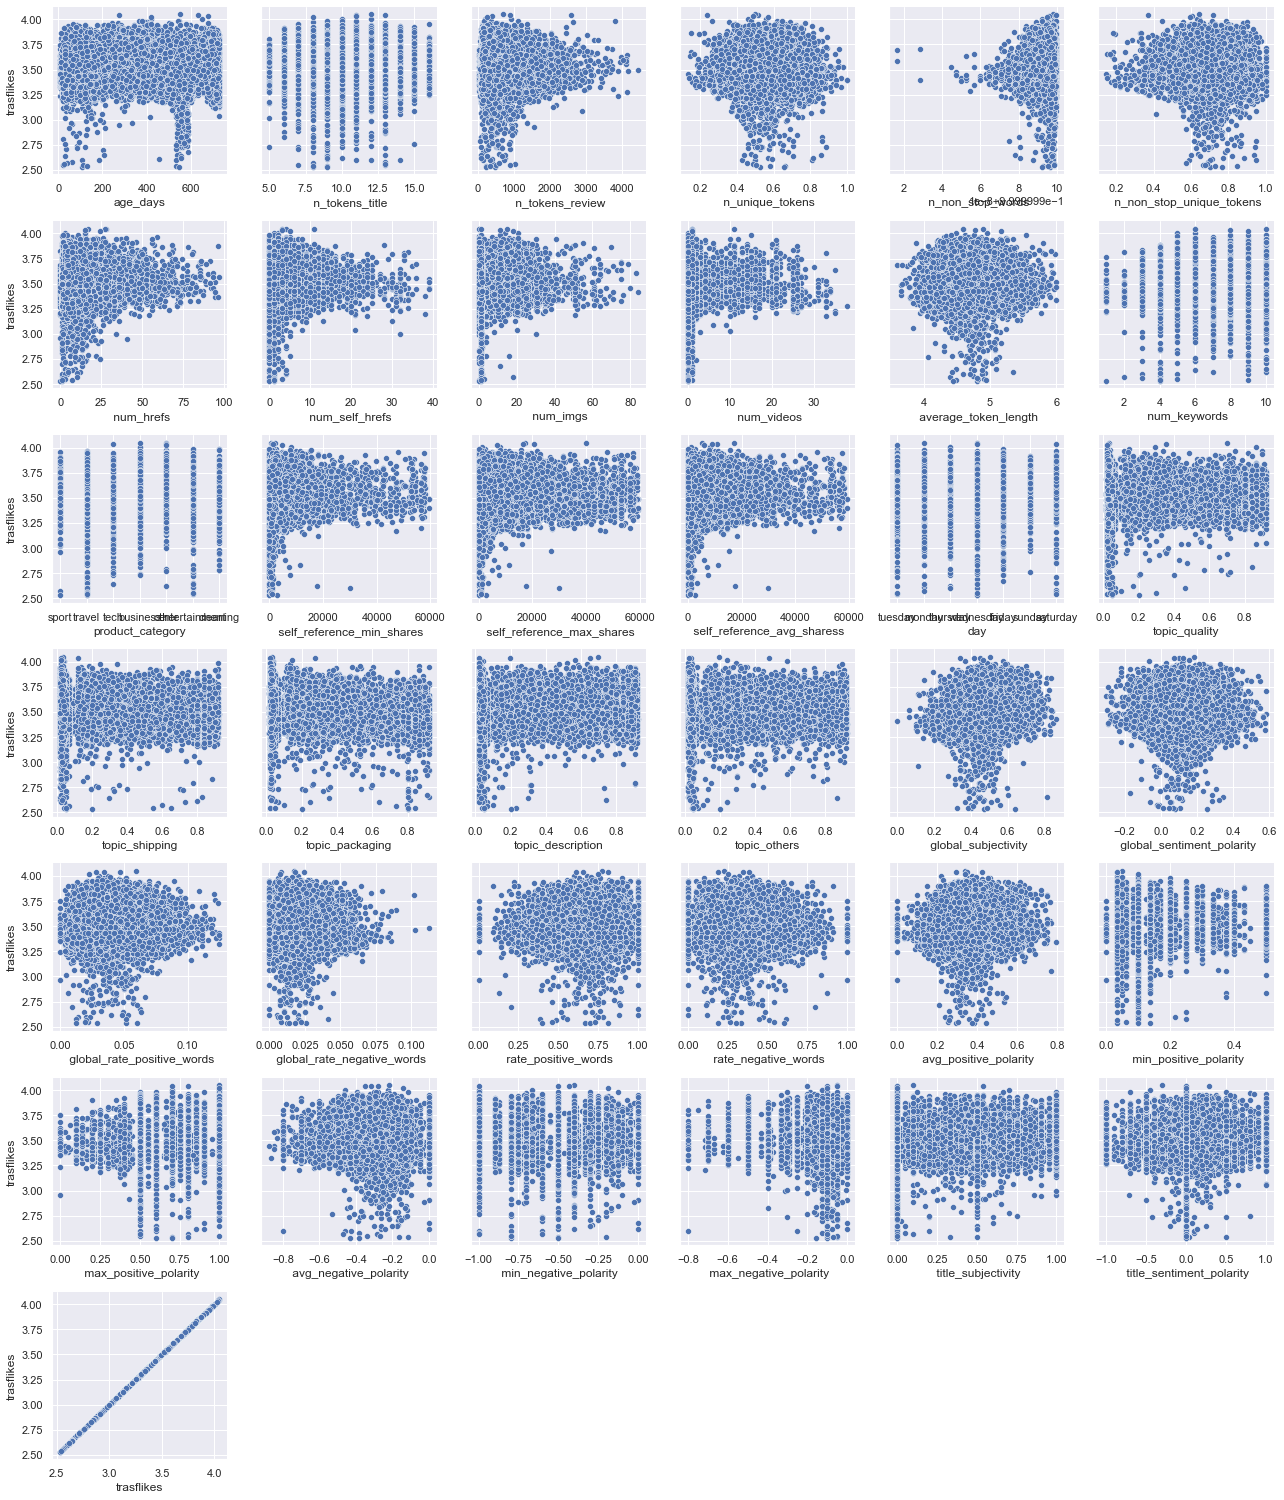

In [212]:
#New scatterplot

columns=dfU.columns
g = sns.FacetGrid(pd.DataFrame(columns), col=0, col_wrap=6, sharex=False)
for ax, x_var in zip(g.axes, columns):
    sns.scatterplot(data=dfU, x=x_var, y=dfU['trasflikes'], ax=ax)
g.tight_layout()

In [44]:
dfU=dfU.reset_index(drop=True)
dfU

age_days   n_tokens_title   n_tokens_review   n_unique_tokens  \
0           436                9               532          0.462264   
1           185               16              1012          0.446247   
2           210               12               506          0.546559   
3           723               11               241          0.543933   
4           345               11               983          0.405930   
...         ...              ...               ...               ...   
26931       609                9               313          0.734266   
26932       428                8               206          0.647059   
26933        93               11              1083          0.535104   
26934        90               12               817          0.452229   
26935       681               13              1239          0.382686   

        n_non_stop_words   n_non_stop_unique_tokens   num_hrefs  \
0                    1.0                   0.594427           7   
1                    1.0                   0.638112           4   
2                    1.0                   0.693291           8   
3                    1.0                   0.648649           5   
4                    1.0                   0.594747          11   
...                  ...                        ...         ...   
26931                1.0                   0.839378           4   
26932                1.0                   0.851240           5   
26933                1.0                   0.712627          32   
26934                1.0                   0.585170          12   
26935                1.0                   0.537212          12   

        num_self_hrefs   num_imgs   num_videos  ...   rate_negative_words  \
0                    7          1            0  ...              0.250000   
1                    2          3           11  ...              0.352941   
2                    3          2            1  ...              0.592593   
3                    4          1            1  ...              0.000000   
4                    7          1            1  ...              0.295082   
...                ...        ...          ...  ...                   ...   
26931                3          0           21  ...              0.411765   
26932                3          0            1  ...              0.250000   
26933               27         11            1  ...              0.447761   
26934                0          2            0  ...              0.292683   
26935               10         10            1  ...              0.134328   

        avg_positive_polarity  min_positive_polarity   max_positive_polarity  \
0                    0.400505               0.136364                     1.0   
1                    0.504457               0.100000                     0.9   
2                    0.179924               0.050000                     0.5   
3                    0.345671               0.136364                     0.7   
4                    0.341548               0.100000                     1.0   
...                       ...                    ...                     ...   
26931                0.367943               0.062500                     1.0   
26932                0.342929               0.100000                     0.5   
26933                0.422991               0.100000                     1.0   
26934                0.308378               0.100000                     0.7   
26935                0.318747               0.033333                     1.0   

        avg_negative_polarity   min_negative_polarity  max_negative_polarity  \
0                   -0.180556                 -0.2500              -0.125000   
1                   -0.318981                 -1.0000              -0.050000   
2                   -0.292708                 -0.7500              -0.100000   
3                    0.000000                  0.0000               0.000000   
4                   -0.256481                 -0.80

In [114]:
df_total=dfU
import pickle
pickle.dump(df_total, open('NOCORR_df_total.pkl', 'wb')) 

In [45]:
#Load of the dataset
df_total = pickle.load(open('NOCORR_df_total.pkl', 'rb'))
df_total

age_days   n_tokens_title   n_tokens_review   n_unique_tokens  \
0           436                9               532          0.462264   
1           185               16              1012          0.446247   
2           210               12               506          0.546559   
3           723               11               241          0.543933   
4           345               11               983          0.405930   
...         ...              ...               ...               ...   
26931       609                9               313          0.734266   
26932       428                8               206          0.647059   
26933        93               11              1083          0.535104   
26934        90               12               817          0.452229   
26935       681               13              1239          0.382686   

        n_non_stop_words   n_non_stop_unique_tokens   num_hrefs  \
0                    1.0                   0.594427           7   
1                    1.0                   0.638112           4   
2                    1.0                   0.693291           8   
3                    1.0                   0.648649           5   
4                    1.0                   0.594747          11   
...                  ...                        ...         ...   
26931                1.0                   0.839378           4   
26932                1.0                   0.851240           5   
26933                1.0                   0.712627          32   
26934                1.0                   0.585170          12   
26935                1.0                   0.537212          12   

        num_self_hrefs   num_imgs   num_videos  ...   rate_negative_words  \
0                    7          1            0  ...              0.250000   
1                    2          3           11  ...              0.352941   
2                    3          2            1  ...              0.592593   
3                    4          1            1  ...              0.000000   
4                    7          1            1  ...              0.295082   
...                ...        ...          ...  ...                   ...   
26931                3          0           21  ...              0.411765   
26932                3          0            1  ...              0.250000   
26933               27         11            1  ...              0.447761   
26934                0          2            0  ...              0.292683   
26935               10         10            1  ...              0.134328   

        avg_positive_polarity  min_positive_polarity   max_positive_polarity  \
0                    0.400505               0.136364                     1.0   
1                    0.504457               0.100000                     0.9   
2                    0.179924               0.050000                     0.5   
3                    0.345671               0.136364                     0.7   
4                    0.341548               0.100000                     1.0   
...                       ...                    ...                     ...   
26931                0.367943               0.062500                     1.0   
26932                0.342929               0.100000                     0.5   
26933                0.422991               0.100000                     1.0   
26934                0.308378               0.100000                     0.7   
26935                0.318747               0.033333                     1.0   

        avg_negative_polarity   min_negative_polarity  max_negative_polarity  \
0                   -0.180556                 -0.2500              -0.125000   
1                   -0.318981                 -1.0000              -0.050000   
2                   -0.292708                 -0.7500              -0.100000   
3                    0.000000                  0.0000               0.000000   
4                   -0.256481                 -0.80

## Division into numerical and categorical datasets and standardization

In [46]:
df_cat=df_total.select_dtypes(include=['object'])
df_cat #2 categorical variables

product_category        day
0                sport    tuesday
1               travel     monday
2               travel   thursday
3               travel    tuesday
4                 tech    tuesday
...                ...        ...
26931    entertainment   thursday
26932         business  wednesday
26933    entertainment    tuesday
26934           travel     friday
26935            sport    tuesday

[26936 rows x 2 columns]

In [47]:
df_num=df_total.select_dtypes(include=[np.number]) #37 numerical variables
df_num

age_days   n_tokens_title   n_tokens_review   n_unique_tokens  \
0           436                9               532          0.462264   
1           185               16              1012          0.446247   
2           210               12               506          0.546559   
3           723               11               241          0.543933   
4           345               11               983          0.405930   
...         ...              ...               ...               ...   
26931       609                9               313          0.734266   
26932       428                8               206          0.647059   
26933        93               11              1083          0.535104   
26934        90               12               817          0.452229   
26935       681               13              1239          0.382686   

        n_non_stop_words   n_non_stop_unique_tokens   num_hrefs  \
0                    1.0                   0.594427           7   
1                    1.0                   0.638112           4   
2                    1.0                   0.693291           8   
3                    1.0                   0.648649           5   
4                    1.0                   0.594747          11   
...                  ...                        ...         ...   
26931                1.0                   0.839378           4   
26932                1.0                   0.851240           5   
26933                1.0                   0.712627          32   
26934                1.0                   0.585170          12   
26935                1.0                   0.537212          12   

        num_self_hrefs   num_imgs   num_videos  ...   rate_negative_words  \
0                    7          1            0  ...              0.250000   
1                    2          3           11  ...              0.352941   
2                    3          2            1  ...              0.592593   
3                    4          1            1  ...              0.000000   
4                    7          1            1  ...              0.295082   
...                ...        ...          ...  ...                   ...   
26931                3          0           21  ...              0.411765   
26932                3          0            1  ...              0.250000   
26933               27         11            1  ...              0.447761   
26934                0          2            0  ...              0.292683   
26935               10         10            1  ...              0.134328   

        avg_positive_polarity   min_positive_polarity   max_positive_polarity  \
0                    0.400505                0.136364                     1.0   
1                    0.504457                0.100000                     0.9   
2                    0.179924                0.050000                     0.5   
3                    0.345671                0.136364                     0.7   
4                    0.341548                0.100000                     1.0   
...                       ...                     ...                     ...   
26931                0.367943                0.062500                     1.0   
26932                0.342929                0.100000                     0.5   
26933                0.422991                0.100000                     1.0   
26934                0.308378                0.100000                     0.7   
26935                0.318747                0.033333                     1.0   

        avg_negative_polarity   min_negative_polarity   max_negative_polarity  \
0                   -0.180556                 -0.2500               -0.125000   
1                   -0.318981                 -1.0000               -0.050000   
2                   -0.292708                 -0.7500               -0.100000   
3                    0.000000                  0.0000                0.000000   
4                   -0.256481     

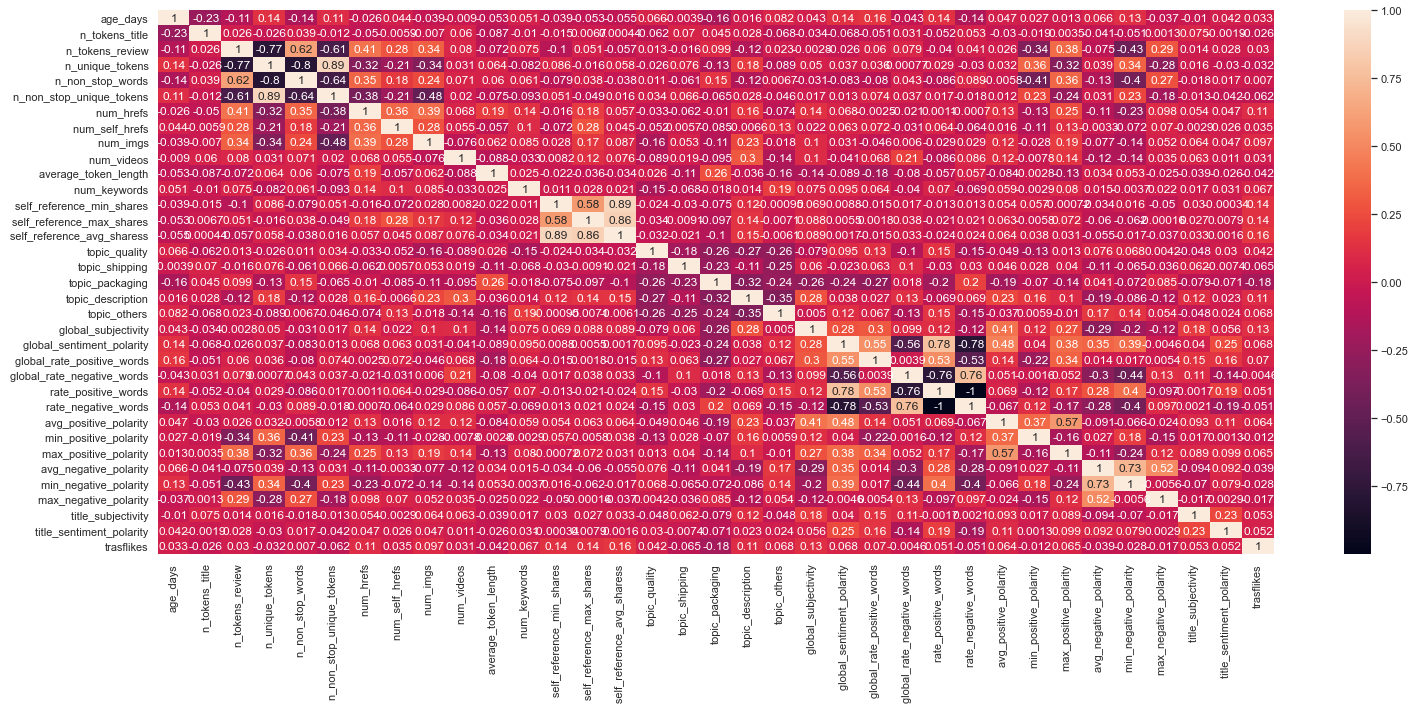

In [48]:
#By looking ayt the correlation matrix identify the most correlated variables

import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
corrMatrix = df_num.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [50]:
df_num.columns

Index(['age_days', ' n_tokens_title', ' n_tokens_review', ' n_unique_tokens',
       ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs',
       ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length',
       ' num_keywords', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       'topic_quality', 'topic_shipping', 'topic_packaging',
       'topic_description', 'topic_others', ' global_subjectivity',
       ' global_sentiment_polarity', ' global_rate_positive_words',
       ' global_rate_negative_words', ' rate_positive_words',
       ' rate_negative_words', ' avg_positive_polarity',
       ' min_positive_polarity', ' max_positive_polarity',
       ' avg_negative_polarity', ' min_negative_polarity',
       ' max_negative_polarity', ' title_subjectivity',
       ' title_sentiment_polarity', 'trasflikes'],
      dtype='object')

In [48]:
#By looking at the pair of variables more correlated to each other it was chosen to delete the variables less correlated with 'trasflikes' (target variable)
df_num = df_num.drop(columns=' rate_negative_words') 
df_num = df_num.drop(columns=' self_reference_max_shares') 
df_num = df_num.drop(columns=' self_reference_min_shares') 
df_num = df_num.drop(columns=' n_unique_tokens') 


In [49]:
df_num

age_days   n_tokens_title   n_tokens_review   n_non_stop_words  \
0           436                9               532                1.0   
1           185               16              1012                1.0   
2           210               12               506                1.0   
3           723               11               241                1.0   
4           345               11               983                1.0   
...         ...              ...               ...                ...   
26931       609                9               313                1.0   
26932       428                8               206                1.0   
26933        93               11              1083                1.0   
26934        90               12               817                1.0   
26935       681               13              1239                1.0   

        n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  \
0                       0.594427           7                7          1   
1                       0.638112           4                2          3   
2                       0.693291           8                3          2   
3                       0.648649           5                4          1   
4                       0.594747          11                7          1   
...                          ...         ...              ...        ...   
26931                   0.839378           4                3          0   
26932                   0.851240           5                3          0   
26933                   0.712627          32               27         11   
26934                   0.585170          12                0          2   
26935                   0.537212          12               10         10   

        num_videos   average_token_length  ...   rate_positive_words  \
0                0               4.785714  ...              0.750000   
1               11               4.387352  ...              0.647059   
2                1               4.974308  ...              0.407407   
3                1               4.912863  ...              1.000000   
4                1               4.293998  ...              0.704918   
...            ...                    ...  ...                   ...   
26931           21               4.431310  ...              0.588235   
26932            1               4.747573  ...              0.750000   
26933            1               4.658356  ...              0.552239   
26934            0               4.735618  ...              0.707317   
26935            1               4.753834  ...              0.865672   

        avg_positive_polarity   min_positive_polarity   max_positive_polarity  \
0                    0.400505                0.136364                     1.0   
1                    0.504457                0.100000                     0.9   
2                    0.179924                0.050000                     0.5   
3                    0.345671                0.136364                     0.7   
4                    0.341548                0.100000                     1.0   
...                       ...                     ...                     ...   
26931                0.367943                0.062500                     1.0   
26932                0.342929                0.100000                     0.5   
26933                0.422991                0.100000                     1.0   
26934                0.308378                0.100000                     0.7   
26935                0.318747                0.033333                     1.0   

        avg_negative_polarity   min_negative_polarity   max_negative_polarity  \
0                   -0.180556                 -0.2500               -0.125000   
1                   -0.318981                 -1.0000               -0.050000   
2                   -0.292708                 -0.7500               -0.100000   
3                    0.000000                  0.0000  

In [50]:
#Scale the numerical variables because the scale can interfere with some algorithms

from sklearn.preprocessing import StandardScaler
independent_variables=df_num.iloc[:,:-1]  #trasflikes column is not scaled

scaler = StandardScaler().fit(independent_variables)  #Adoption of the Standard Scaler
scalednum_df = pd.DataFrame(scaler.transform(independent_variables))  #creation of the scaled dataframe
scalednum_df.columns = independent_variables.columns



scalednum_df

age_days   n_tokens_title   n_tokens_review   n_non_stop_words  \
0      0.351077        -0.660253         -0.049442           0.470967   
1     -0.825387         2.724615          1.047843           0.808120   
2     -0.708209         0.790405         -0.108878           0.446205   
3      1.696277         0.306852         -0.714671          -0.444701   
4     -0.075450         0.306852          0.981548           0.776106   
...         ...              ...               ...                ...   
26931  1.161947        -0.660253         -0.550078          -0.050521   
26932  0.313580        -1.143806         -0.794681          -0.821622   
26933 -1.256601         0.306852          1.210149           0.882404   
26934 -1.270662         0.790405          0.602071           0.744091   
26935  1.499419         1.273957          1.566767           0.906915   

        n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  \
0                      -1.006949   -0.387139         1.060859  -0.439692   
1                      -0.567789   -0.682997        -0.373630  -0.180610   
2                      -0.013077   -0.288520        -0.086732  -0.310151   
3                      -0.461863   -0.584378         0.200166  -0.439692   
4                      -1.003738    0.007337         1.060859  -0.439692   
...                          ...         ...              ...        ...   
26931                   1.455537   -0.682997        -0.086732  -0.569233   
26932                   1.574780   -0.584378        -0.086732  -0.569233   
26933                   0.181310    2.078338         6.798815   0.855718   
26934                  -1.100009    0.105956        -0.947425  -0.310151   
26935                  -1.582128    0.105956         1.921553   0.726177   

        num_videos   average_token_length  ...   global_rate_negative_words  \
0        -0.325527               0.351820  ...                    -0.559062   
1         2.737136              -1.081378  ...                     0.068964   
2        -0.047103               1.030329  ...                     1.403878   
3        -0.047103               0.809266  ...                    -1.647354   
4        -0.047103              -1.417239  ...                     0.119598   
...            ...                    ...  ...                          ...   
26931     5.521376              -0.923229  ...                     2.668726   
26932    -0.047103               0.214598  ...                    -0.242084   
26933    -0.047103              -0.106378  ...                     1.025644   
26934    -0.325527               0.171588  ...                    -0.230044   
26935    -0.047103               0.237123  ...                    -0.946421   

        rate_positive_words   avg_positive_polarity   min_positive_polarity  \
0                  0.309856                0.436875                0.578956   
1                 -0.381792                1.684791                0.030889   
2                 -1.991979               -2.211141               -0.722702   
3                  1.989574               -0.221394                0.578956   
4                  0.006956               -0.270885                0.030889   
...                     ...                     ...                     ...   
26931             -0.777020                0.045978               -0.534304   
26932              0.309856               -0.254307                0.030889   
26933             -1.018876                0.706808                0.030889   
26934              0.023075               -0.669085                0.030889   
26935              1.087039               -0.544607               -0.973899   

        max_positive_polarity   avg_negative_polarity   min_negative_polarity  \
0                    1.040480                0.722024                1.019100   
1                    0.569257               -0.462521               -1.677725   
2                   -1.315635               -0.237695               -0.77878

In [121]:
pickle.dump(scaler, open('NOCORR_scaler.pkl', 'wb'))

In [51]:
scalednum_df.describe() #Check if the standardization has gone well

age_days   n_tokens_title   n_tokens_review   n_non_stop_words  \
count  2.693600e+04     2.693600e+04      2.693600e+04       2.693600e+04   
mean  -2.038596e-17     6.566456e-16      1.109399e-16       2.772184e-08   
std    1.000019e+00     1.000019e+00      1.000019e+00       1.000019e+00   
min   -1.655005e+00    -2.594464e+00     -1.224451e+00      -1.959743e+01   
25%   -8.722580e-01    -6.602533e-01     -6.735225e-01      -3.476563e-01   
50%   -5.670120e-02    -1.767007e-01     -3.077610e-01       2.606208e-01   
75%    8.760333e-01     7.904047e-01      3.894719e-01       6.623039e-01   
max    1.733774e+00     2.724615e+00      8.911715e+00       1.151277e+00   

        n_non_stop_unique_tokens     num_hrefs   num_self_hrefs      num_imgs  \
count               2.693600e+04  2.693600e+04     2.693600e+04  2.693600e+04   
mean                1.771757e-16  6.468813e-17     1.667231e-16  2.178940e-16   
std                 1.000019e+00  1.000019e+00     1.000019e+00  1.000019e+00   
min                -5.495364e+00 -1.077473e+00    -9.474252e-01 -5.692331e-01   
25%                -6.119310e-01 -5.843776e-01    -6.605274e-01 -4.396921e-01   
50%                -1.479007e-03 -2.885202e-01    -8.673183e-02 -4.396921e-01   
75%                 6.373516e-01  3.031945e-01     2.001659e-01 -5.106905e-02   
max                 3.070263e+00  8.488581e+00     1.024159e+01  1.031221e+01   

         num_videos   average_token_length  ...   global_rate_negative_words  \
count  2.693600e+04           2.693600e+04  ...                 2.693600e+04   
mean   1.526732e-17          -1.156699e-15  ...                -4.404868e-17   
std    1.000019e+00           1.000019e+00  ...                 1.000019e+00   
min   -3.255274e-01          -3.914052e+00  ...                -1.647354e+00   
25%   -3.255274e-01          -6.837718e-01  ...                -6.687010e-01   
50%   -3.255274e-01          -4.579576e-02  ...                -1.396164e-01   
75%   -4.710343e-02           6.310074e-01  ...                 4.734199e-01   
max    1.025458e+01           4.720484e+00  ...                 9.201222e+00   

        rate_positive_words   avg_positive_polarity   min_positive_polarity  \
count          2.693600e+04            2.693600e+04            2.693600e+04   
mean           4.812835e-16            2.841505e-16           -5.005566e-16   
std            1.000019e+00            1.000019e+00            1.000019e+00   
min           -4.729298e+00           -4.371086e+00           -1.476293e+00   
25%           -6.112793e-01           -6.241503e-01           -7.227017e-01   
50%            6.989661e-02           -3.188790e-02            3.088946e-02   
75%            6.647263e-01            5.861922e-01            3.088946e-02   
max            1.989574e+00            5.172687e+00            6.059619e+00   

        max_positive_polarity   avg_negative_polarity   min_negative_polarity  \
count            2.693600e+04            2.693600e+04            2.693600e+04   
mean             1.753539e-16           -8.941631e-17            3.650349e-16   
std              1.000019e+00            1.000019e+00            1.000019e+00   
min             -3.671751e+00           -5.220510e+00           -1.677725e+00   
25%             -8.444122e-01           -5.496783e-01           -5.989950e-01   
50%              9.803413e-02            7.785326e-02            1.201583e-01   
75%              1.040480e+00            6.217932e-01            8.393116e-01   
max              1.040480e+00            2.267083e+00            1.918042e+00   

        max_negative_polarity   title_subjectivity   title_sentiment_polarity  
count            2.693600e+04         2.693600e+04               2.693600e+04  
mean            -1.287292e-16        -7.657967e-16              -2.693149e-16  
std              1.000019e+00         1.000019e+00               1.000019e+00  
min             -7.902309e+00        -8.652244e-01              -4.061325e+00  
25%             -1.80842

## Creation of the dummies

In [52]:
df_cat

product_category        day
0                sport    tuesday
1               travel     monday
2               travel   thursday
3               travel    tuesday
4                 tech    tuesday
...                ...        ...
26931    entertainment   thursday
26932         business  wednesday
26933    entertainment    tuesday
26934           travel     friday
26935            sport    tuesday

[26936 rows x 2 columns]

In [53]:
dummies=pd.get_dummies(df_cat[['product_category','day']],drop_first=True)
dummies

product_category_cleaning  product_category_entertainment  \
0                              0                               0   
1                              0                               0   
2                              0                               0   
3                              0                               0   
4                              0                               0   
...                          ...                             ...   
26931                          0                               1   
26932                          0                               0   
26933                          0                               1   
26934                          0                               0   
26935                          0                               0   

       product_category_other  product_category_sport  product_category_tech  \
0                           0                       1                      0   
1                           0                       0                      0   
2                           0                       0                      0   
3                           0                       0                      0   
4                           0                       0                      1   
...                       ...                     ...                    ...   
26931                       0                       0                      0   
26932                       0                       0                      0   
26933                       0                       0                      0   
26934                       0                       0                      0   
26935                       0                       1                      0   

       product_category_travel  day_monday  day_saturday  day_sunday  \
0                            0           0             0           0   
1                            1           1             0           0   
2                            1           0             0           0   
3                            1           0             0           0   
4                            0           0             0           0   
...                        ...         ...           ...         ...   
26931                        0           0             0           0   
26932                        0           0             0           0   
26933                        0           0             0           0   
26934                        1           0             0           0   
26935                        0           0             0           0   

       day_thursday  day_tuesday  day_wednesday  
0                 0            1              0  
1                 0            0              0  
2                 1            0              0  
3                 0            1              0  
4                 0            1              0  
...             ...          ...            ...  
26931             1            0              0  
26932             0            0              1  
26933             0            1              0  
26934             0            0              0  
26935             0            1              0  

[26936 rows x 12 columns]

In [54]:
X=pd.concat([dummies,scalednum_df],axis=1) #Concatenation of the scaled numerical dataset and the categorical dataset
X

product_category_cleaning  product_category_entertainment  \
0                              0                               0   
1                              0                               0   
2                              0                               0   
3                              0                               0   
4                              0                               0   
...                          ...                             ...   
26931                          0                               1   
26932                          0                               0   
26933                          0                               1   
26934                          0                               0   
26935                          0                               0   

       product_category_other  product_category_sport  product_category_tech  \
0                           0                       1                      0   
1                           0                       0                      0   
2                           0                       0                      0   
3                           0                       0                      0   
4                           0                       0                      1   
...                       ...                     ...                    ...   
26931                       0                       0                      0   
26932                       0                       0                      0   
26933                       0                       0                      0   
26934                       0                       0                      0   
26935                       0                       1                      0   

       product_category_travel  day_monday  day_saturday  day_sunday  \
0                            0           0             0           0   
1                            1           1             0           0   
2                            1           0             0           0   
3                            1           0             0           0   
4                            0           0             0           0   
...                        ...         ...           ...         ...   
26931                        0           0             0           0   
26932                        0           0             0           0   
26933                        0           0             0           0   
26934                        1           0             0           0   
26935                        0           0             0           0   

       day_thursday  ...   global_rate_negative_words   rate_positive_words  \
0                 0  ...                    -0.559062              0.309856   
1                 0  ...                     0.068964             -0.381792   
2                 1  ...                     1.403878             -1.991979   
3                 0  ...                    -1.647354              1.989574   
4                 0  ...                     0.119598              0.006956   
...             ...  ...                          ...                   ...   
26931             1  ...                     2.668726             -0.777020   
26932             0  ...                    -0.242084              0.309856   
26933             0  ...                     1.025644             -1.018876   
26934             0  ...                    -0.230044              0.023075   
26935             0  ...                    -0.946421              1.087039   

        avg_positive_polarity   min_positive_polarity   max_positive_polarity  \
0                    0.436875                0.578956                1.040480   
1                    1.684791                0.030889                0.569257   
2                   -2.211141               -0.722702               -1.315635   
3                   -0.221394                0.578956               -0.373189   
4         

In [126]:
pickle.dump(X, open('NOCORR_X.pkl', 'wb')) 

In [55]:
Y=df_total.iloc[:,-1]
Y


0        3.535788
1        3.355718
2        3.396167
3        3.311379
4        3.396167
           ...   
26931    3.414465
26932    3.681655
26933    3.430813
26934    3.430813
26935    3.556065
Name: trasflikes, Length: 26936, dtype: float64

In [128]:
pickle.dump(Y, open('NOCORR_Y.pkl', 'wb')) 

In [56]:
import pickle
X = pickle.load(open('NOCORR_X.pkl', 'rb')) #Load of X
X

product_category_cleaning  product_category_entertainment  \
0                              0                               0   
1                              0                               0   
2                              0                               0   
3                              0                               0   
4                              0                               0   
...                          ...                             ...   
26931                          0                               1   
26932                          0                               0   
26933                          0                               1   
26934                          0                               0   
26935                          0                               0   

       product_category_other  product_category_sport  product_category_tech  \
0                           0                       1                      0   
1                           0                       0                      0   
2                           0                       0                      0   
3                           0                       0                      0   
4                           0                       0                      1   
...                       ...                     ...                    ...   
26931                       0                       0                      0   
26932                       0                       0                      0   
26933                       0                       0                      0   
26934                       0                       0                      0   
26935                       0                       1                      0   

       product_category_travel  day_monday  day_saturday  day_sunday  \
0                            0           0             0           0   
1                            1           1             0           0   
2                            1           0             0           0   
3                            1           0             0           0   
4                            0           0             0           0   
...                        ...         ...           ...         ...   
26931                        0           0             0           0   
26932                        0           0             0           0   
26933                        0           0             0           0   
26934                        1           0             0           0   
26935                        0           0             0           0   

       day_thursday  ...   global_rate_negative_words   rate_positive_words  \
0                 0  ...                    -0.559062              0.309856   
1                 0  ...                     0.068964             -0.381792   
2                 1  ...                     1.403878             -1.991979   
3                 0  ...                    -1.647354              1.989574   
4                 0  ...                     0.119598              0.006956   
...             ...  ...                          ...                   ...   
26931             1  ...                     2.668726             -0.777020   
26932             0  ...                    -0.242084              0.309856   
26933             0  ...                     1.025644             -1.018876   
26934             0  ...                    -0.230044              0.023075   
26935             0  ...                    -0.946421              1.087039   

        avg_positive_polarity   min_positive_polarity   max_positive_polarity  \
0                    0.436875                0.578956                1.040480   
1                    1.684791                0.030889                0.569257   
2                   -2.211141               -0.722702               -1.315635   
3                   -0.221394                0.578956               -0.373189   
4         

In [57]:
Y = pickle.load(open('NOCORR_Y.pkl', 'rb')) #Load of Y
Y

0        3.535788
1        3.355718
2        3.396167
3        3.311379
4        3.396167
           ...   
26931    3.414465
26932    3.681655
26933    3.430813
26934    3.430813
26935    3.556065
Name: trasflikes, Length: 26936, dtype: float64

In [58]:
#Split the data into train and test sets
#test set size=30% of the total dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, 
                                                    test_size =0.3, 
                                                    
                                                    
                                                    random_state= 123) #fix random seed for replicability

print(X_train.shape)
print(X_test.shape)

(18855, 42)
(8081, 42)


## Fit the model

In [59]:
from sklearn.model_selection import GridSearchCV
from scipy.special import boxcox, inv_boxcox

def gs_regression(model, par) :
    gs = GridSearchCV(model, par,cv=5,scoring ='neg_mean_absolute_error') #negative mean absolute error as  scoring and cv=5
    gs = gs.fit(X_train,y_train)

    #summarize the results of your GRIDSEARCH
    print('***GRIDSEARCH RESULTS***')
    print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
    means = gs.cv_results_['mean_test_score']
    stds = gs.cv_results_['std_test_score']
    params = gs.cv_results_['params']
    
 
    y_pred_train=gs.predict(X_train)
    y_pred_test=gs.predict(X_test) 
    
    y_train_trasf=inv_boxcox(y_train, boxcox_data[1]) #apply the inverse of the Box Cox trasformation
    y_test_trasf= inv_boxcox(y_test, boxcox_data[1])
    y_pred_train_trasf=inv_boxcox(y_pred_train, boxcox_data[1])
    y_pred_test_trasf=inv_boxcox(y_pred_test, boxcox_data[1])
    
            
    from sklearn import metrics
    print()
    print("MAE  train %.3f (%f)  test %.3f (%f)" % (metrics.mean_absolute_error(y_train, y_pred_train), metrics.mean_absolute_error(y_train_trasf, y_pred_train_trasf) ,metrics.mean_absolute_error(y_test, y_pred_test),  metrics.mean_absolute_error(y_test_trasf, y_pred_test_trasf)  ) )
    print("MSE  train %.3f              test %.3f" % (metrics.mean_squared_error(y_train, y_pred_train), metrics.mean_squared_error(y_test, y_pred_test)) ) 
    print("RMSE train %.3f              test %.3f" % (np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)), np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))) ) 
    print("r2   train %.3f              test %.3f" % (metrics.r2_score(y_train, y_pred_train), metrics.r2_score(y_test, y_pred_test)) )

## Gradient Boosting

In [60]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor 

regressor = GradientBoostingRegressor() 
parameters = {"n_estimators":[100,300,350], "learning_rate":[0.001, 0.1,0.5], 
              "random_state" : [10] ,
             "max_depth":[3,4]}

gs_regression(regressor, parameters)

***GRIDSEARCH RESULTS***
Best score: -0.100773 using {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'random_state': 10}

MAE  train 0.094 (2238.887756)  test 0.100 (2083.662759)
MSE  train 0.015              test 0.017
RMSE train 0.123              test 0.132
r2   train 0.286              test 0.166


In [64]:
GB_regression = GradientBoostingRegressor (learning_rate = 0.1, max_depth = 3, n_estimators = 300, random_state = 10)
GB_model=GB_regression.fit(X_train, y_train)
y_pred_test =GB_regression.predict(X_test)
y_pred_train = GB_regression.predict(X_train)
y_train_trasf=inv_boxcox(y_train, boxcox_data[1]) #apply the inverse of the Box Cox trasformation
y_test_trasf= inv_boxcox(y_test, boxcox_data[1])
y_pred_train_trasf=inv_boxcox(y_pred_train, boxcox_data[1])
y_pred_test_trasf=inv_boxcox(y_pred_test, boxcox_data[1])




print("MAE  train %.3f (%f)  test %.3f (%f)" % (metrics.mean_absolute_error(y_train, y_pred_train), metrics.mean_absolute_error(y_train_trasf, y_pred_train_trasf) ,metrics.mean_absolute_error(y_test, y_pred_test),  metrics.mean_absolute_error(y_test_trasf, y_pred_test_trasf)  ) )
print("MSE  train %.3f              test %.3f" % (metrics.mean_squared_error(y_train, y_pred_train), metrics.mean_squared_error(y_test, y_pred_test)) ) 
print("RMSE train %.3f              test %.3f" % (np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)), np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))) ) 
print("r2   train %.3f              test %.3f" % (metrics.r2_score(y_train, y_pred_train), metrics.r2_score(y_test, y_pred_test)) )


MAE  train 0.094 (2238.887756)  test 0.100 (2083.662759)
MSE  train 0.015              test 0.017
RMSE train 0.123              test 0.132
r2   train 0.286              test 0.166


In [65]:
pickle.dump(GB_model, open('NOCORRRF_GB.pkl', 'wb'))

## Check residuals

In [73]:
y_pred_train=GB_regression.predict(X_train)

residuals_GB=y_pred_train-y_train

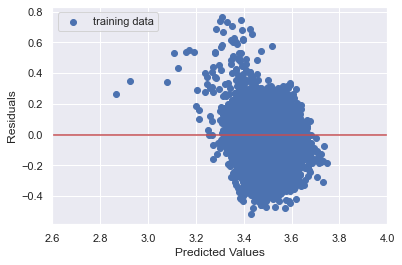

In [74]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(y_pred_train,residuals_GB, c="b", label="training data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=2.6, xmax=4, color="r")
plt.xlim([2.6,4])
plt.show()

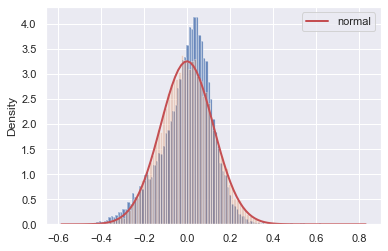

In [75]:
nb_error = np.array(residuals_GB).flatten()

error = np.array(residuals_GB).reshape(-1,1)
scaled_error= StandardScaler(copy=False).fit(error).transform(error).flatten()

import numpy as np
import scipy 
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot_2samples
from matplotlib import pyplot as plt
import seaborn as sns



dist = getattr(scipy.stats, 'norm')
param = dist.fit(nb_error)

err_mean=param[-2]
err_std=param[-1]

# We generate a sample of size  len(mr_scaled) of data distributed according to distribution dist
# The function rvs generates a sample with distribution dist with mean loc and std scale
test_dist = dist.rvs(*param[0:-2],loc=param[-2], scale=param[-1],size = len(nb_error))


# plot the distribution and compare with a normal

ax = sns.histplot(nb_error, stat='density')

# calculate the pdf
x0, x1 = ax.get_xlim()  # extract the endpoints for the x-axis
x_pdf = np.linspace(x0, x1, 100)
y_pdf = scipy.stats.norm.pdf(x_pdf, loc=err_mean, scale=err_std)

ax.plot(x_pdf, y_pdf, 'r', lw=2, label='normal')                                                   
ax.legend() 

plt.hist(nb_error,alpha=.3, density=True,bins='auto')
plt.hist(test_dist,alpha=.3, density=True,bins='auto')
plt.show()